# 클러스터 summary

## 1. Iris 데이터를 사용한 클러스터링 테스트

### Setting

In [4]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### iris 데이터 로드

In [5]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### feature 이름 전처리

In [14]:
cols = [item[:-5] for item in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [15]:
iris_df = pd.DataFrame(iris.data, columns=cols)
iris_df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### 2개의 feature로 클러스터링 테스트

In [25]:
iris_df.columns[2:].values

array(['petal length', 'petal width'], dtype=object)

In [26]:
feature = iris_df[iris_df.columns[2:].values]
feature

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### KMeans

In [28]:
model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(n_clusters=3)

### 클러스터링에 사용된 라벨

In [29]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 클러스터의 중심값 확인
- 각 클러스터 별 중심값

In [30]:
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

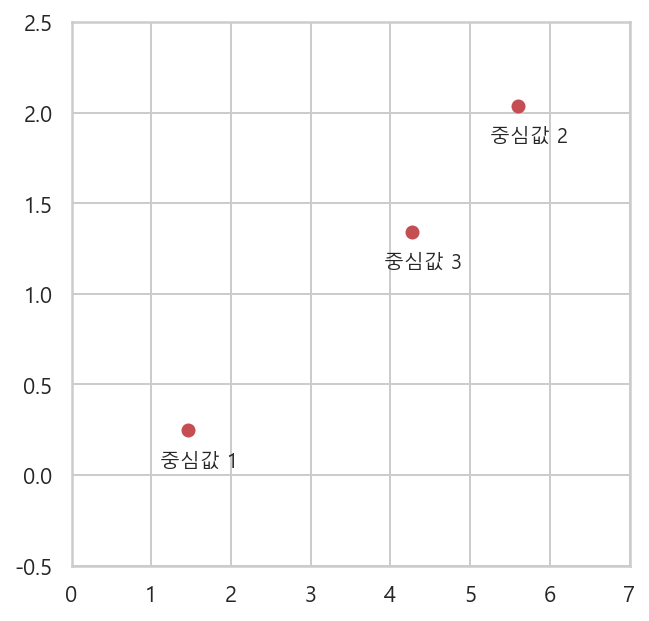

In [45]:
plt.figure(figsize=(5, 5))

for i in range(3) :
    plt.plot(model.cluster_centers_[i][0], model.cluster_centers_[i][1], 'ro')
    plt.text(model.cluster_centers_[i][0] - 0.35,
             model.cluster_centers_[i][1] - 0.2, '중심값 {}'.format(i+1))
    
plt.xlim(0, 7)
plt.ylim(-0.5, 2.5)
plt.show() ;

### 예측값 확인

In [47]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
predict

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
145,1
146,1
147,1
148,1


In [48]:
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


### 클러스터링 결과확인

In [49]:
centers = pd.DataFrame(model.cluster_centers_,
                       columns=['petal length', 'petal width'])
centers

,petal length,petal width
0,1.462000,0.246000
1,5.595833,2.037500
2,4.269231,1.342308


In [50]:
center_x = centers['petal length']
center_y = centers['petal width']

center_x, center_y

(0    1.462000
 1    5.595833
 2    4.269231
 Name: petal length, dtype: float64, 0    0.246000
 1    2.037500
 2    1.342308
 Name: petal width, dtype: float64)

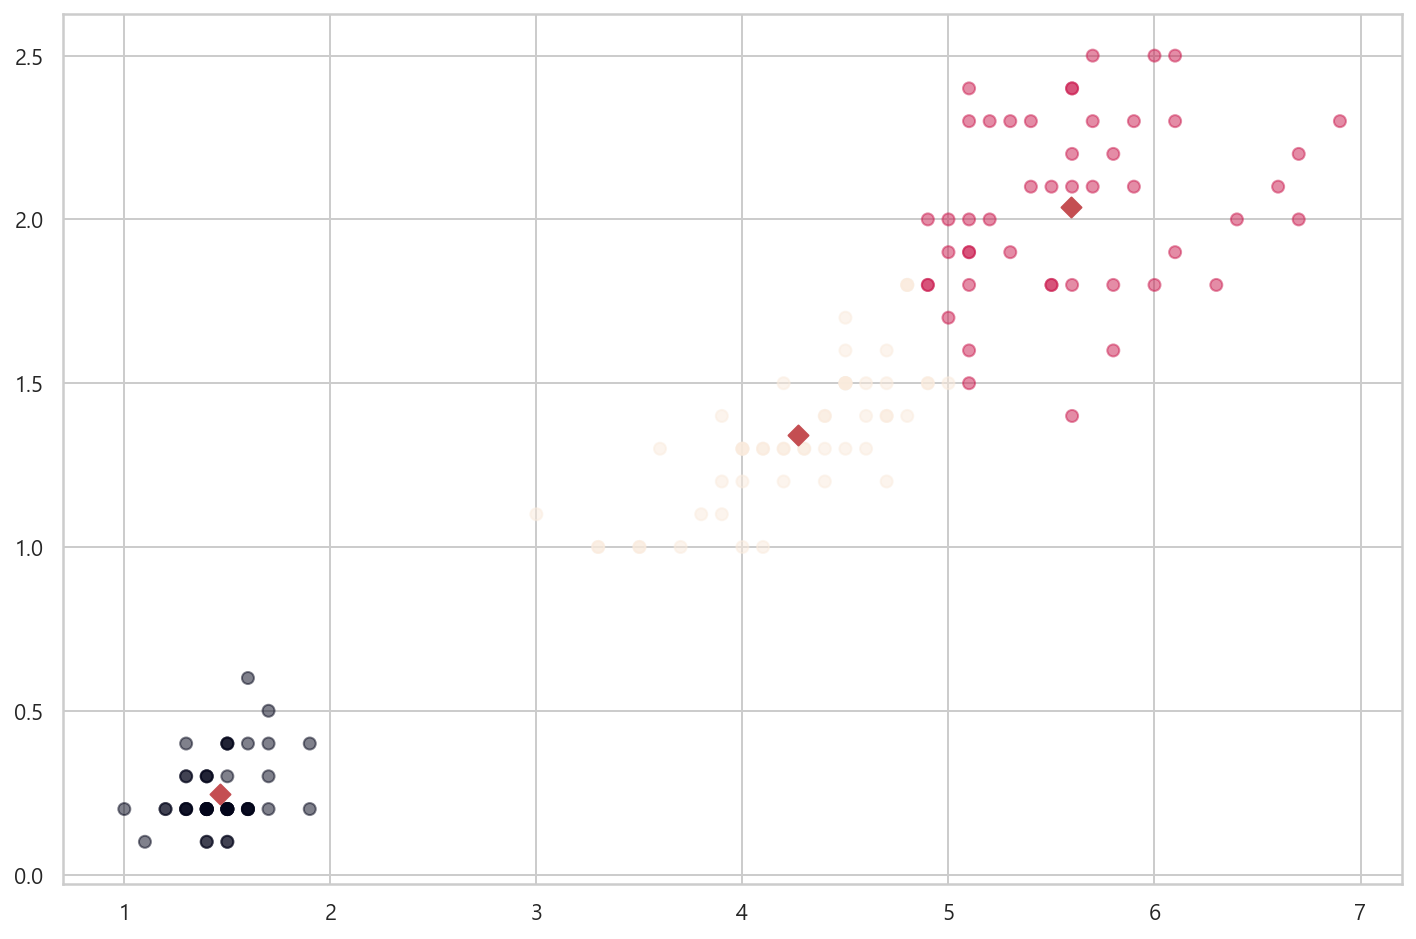

In [52]:
plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'],
           c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show() ;

## 2. 가상 데이터를 사용한 클러스터링 테스트
- 군집화 용 데이터 생성

In [55]:
from sklearn.datasets import make_blobs

In [56]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.8, random_state=0)

In [58]:
print(X.shape, y.shape)

(200, 2) (200,)


In [60]:
X[:10]

array([[-1.69242695,  3.62202539],
       [ 0.69794036,  4.4288665 ],
       [ 1.10022802,  4.60631734],
       [-1.44872404,  3.38424521],
       [ 1.21486062,  5.36489604],
       [-0.90830163,  1.97077775],
       [ 2.47211942,  0.43703328],
       [ 1.65684156,  2.4412893 ],
       [ 1.07779975,  4.62537882],
       [-1.67942681,  2.60200265]])

In [62]:
y[:10]

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2])

### 라벨 데이터 확인

In [64]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1, 2]), array([67, 67, 66], dtype=int64))

In [74]:
unique_df = pd.DataFrame(unique, columns=['unique'])
unique_df['counts'] = counts
unique_df

,unique,counts
0,0,67
1,1,67
2,2,66


### 가상 데이터 정리

In [76]:
cluster_df = pd.DataFrame(data=X, columns=['dt1', 'dt2'])
cluster_df['target'] = y
cluster_df.head()

,dt1,dt2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


### 클러스터링 

In [77]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_labels'] = cluster_labels

In [78]:
cluster_df

,dt1,dt2,target,kmeans_labels
0,-1.692427,3.622025,2,2
1,0.697940,4.428867,0,1
2,1.100228,4.606317,0,1
3,-1.448724,3.384245,2,2
4,1.214861,5.364896,0,1
...,...,...,...,...
195,2.956576,0.033718,1,0
196,-2.074113,4.245523,2,2
197,2.783411,1.151438,1,0
198,1.226724,3.620511,0,1


### 클러스터링 결과 확인 1

In [87]:
np.unique(cluster_labels)

array([0, 1, 2])

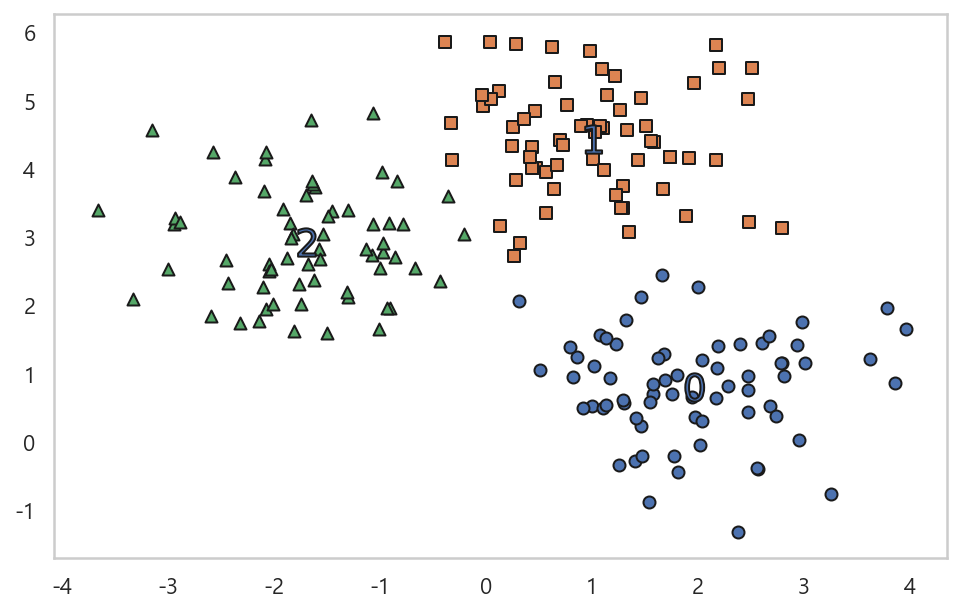

In [91]:
plt.figure(figsize=(8, 5))

center = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels :
    label_cluster = cluster_df[cluster_df['kmeans_labels']==label]
    center_x_y = center[label]
    
    plt.scatter(x=label_cluster['dt1'], y=label_cluster['dt2'],
               edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='b', edgecolor='k',
               marker='$%d$' % label)

    plt.grid(False)    
plt.show() ;

In [83]:
cluster_df[cluster_df['kmeans_labels']==1].head()

,dt1,dt2,target,kmeans_labels
1,0.697940,4.428867,0,1
2,1.100228,4.606317,0,1
4,1.214861,5.364896,0,1
8,1.077800,4.625379,0,1
10,0.653729,5.281743,0,1


## 3. 가상 데이터를 사용한 클러스터링 테스트
- 클러스터의 갯수별 클러스터 형태 확인

In [2]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

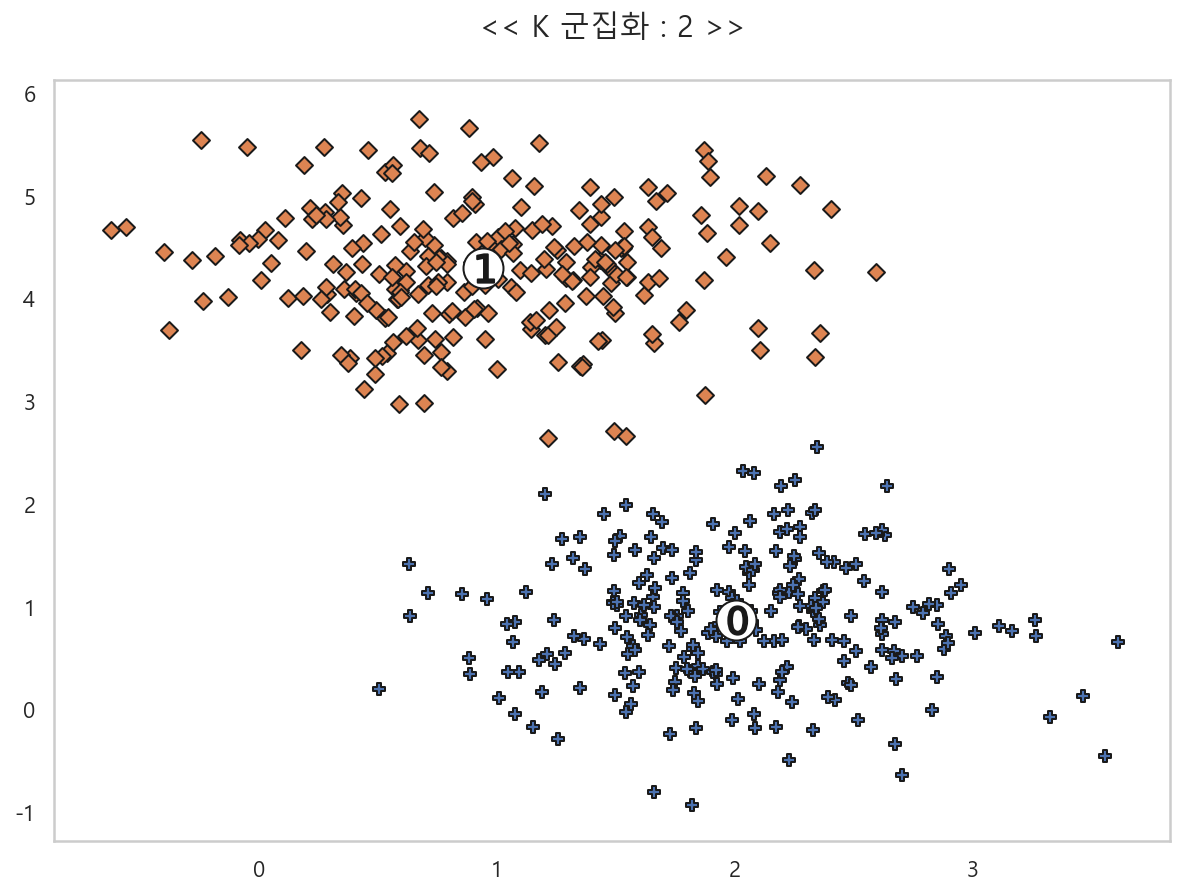

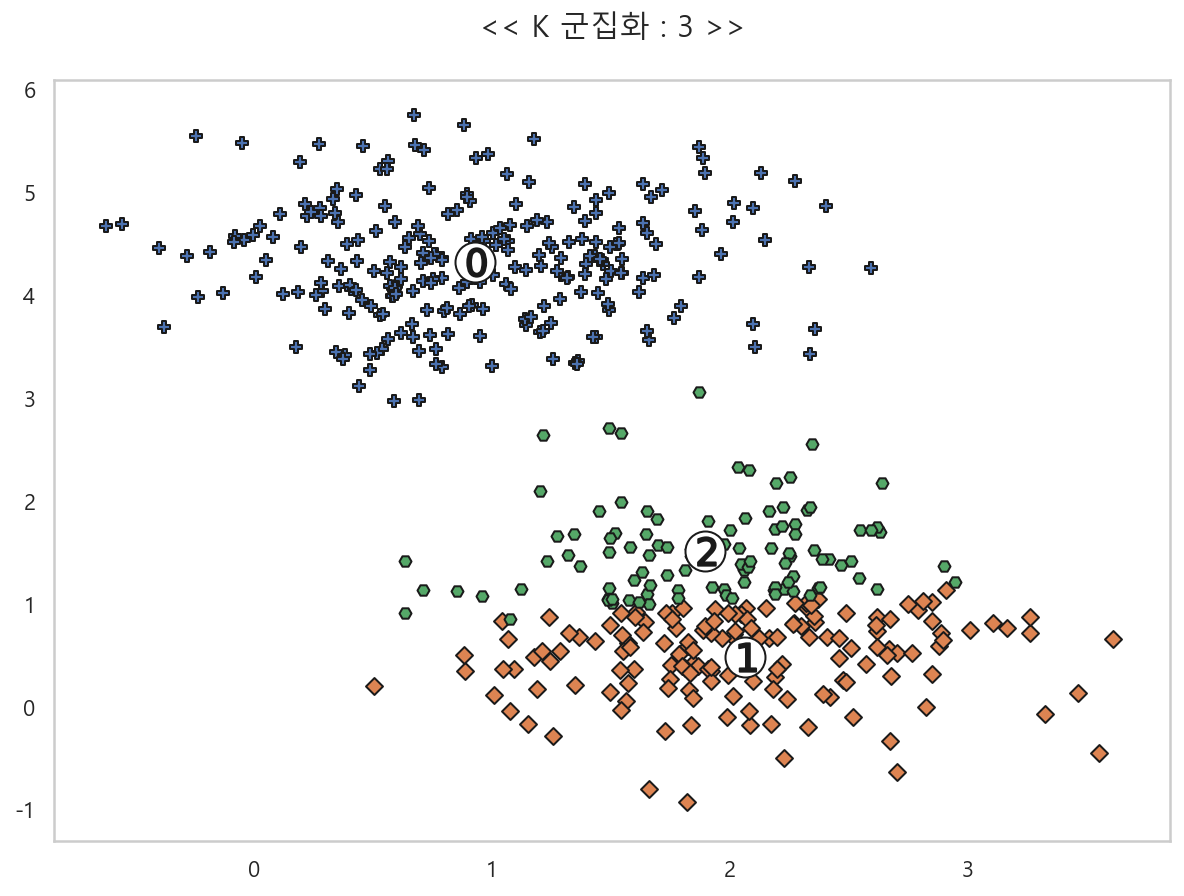

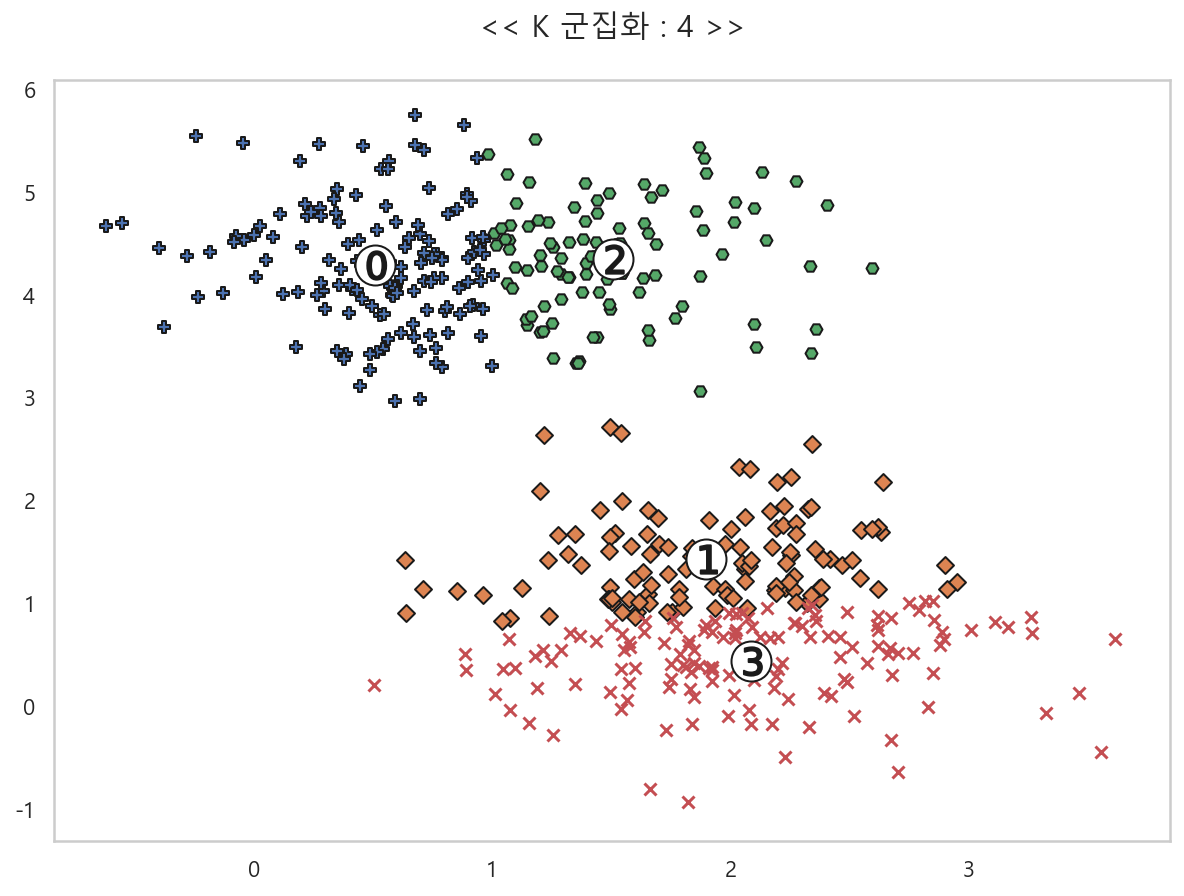

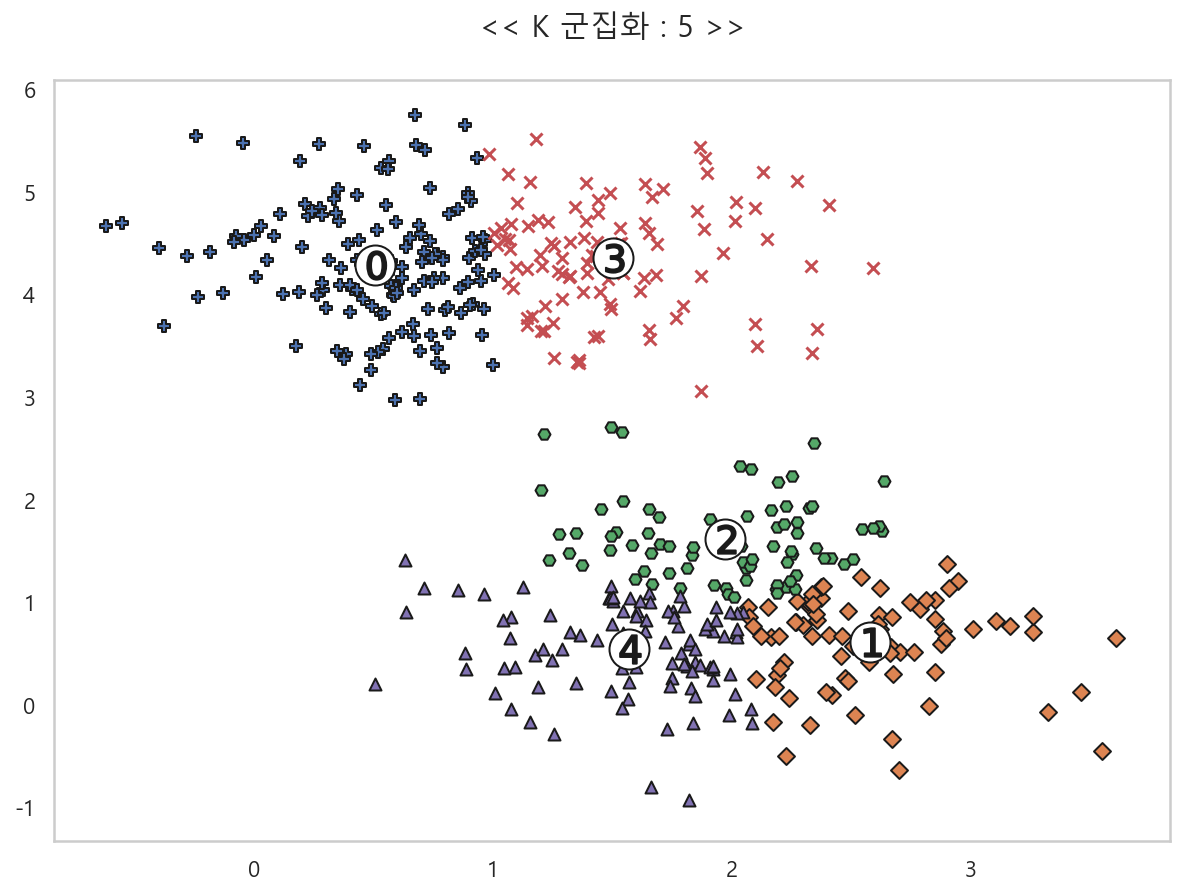

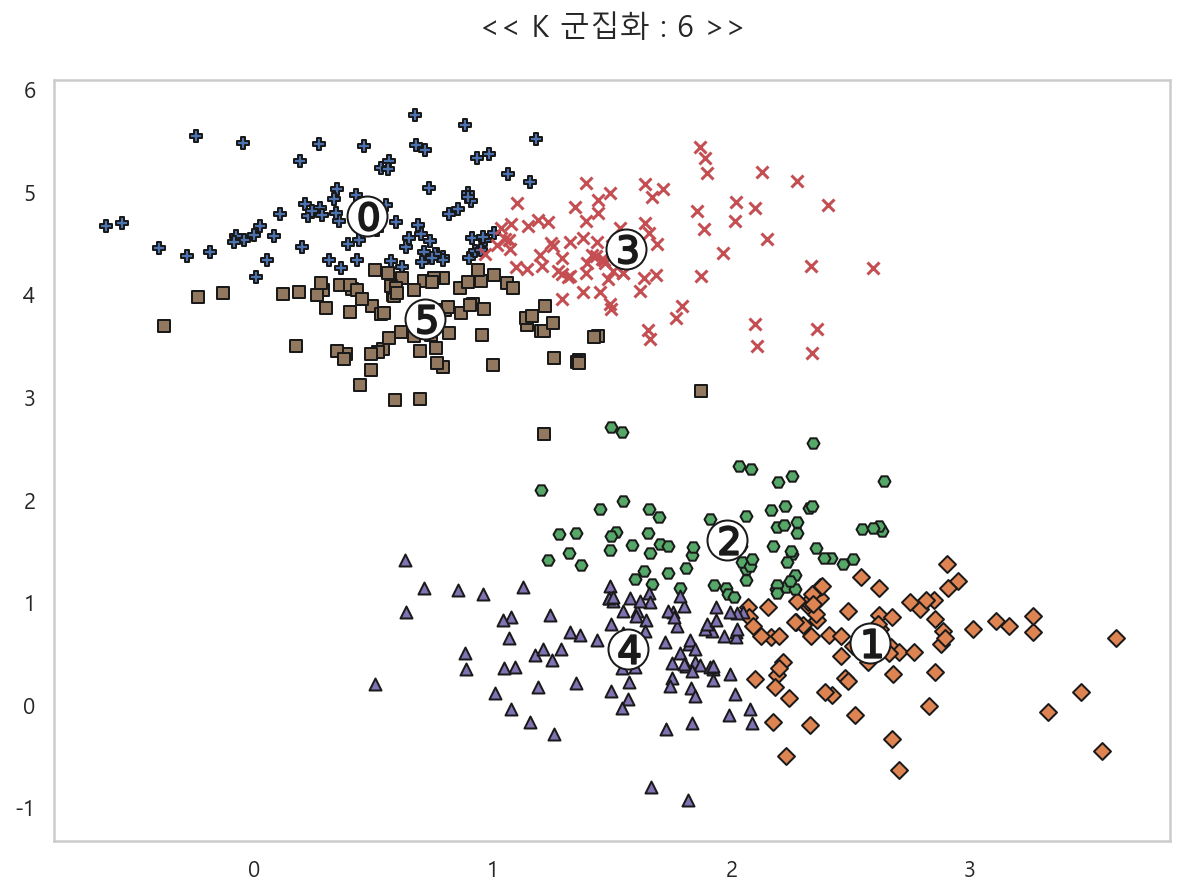

In [6]:
X, y = make_blobs(n_samples=500, n_features=2, centers=2,
                 cluster_std=0.6, random_state=0)
cluster_df = pd.DataFrame(data=X, columns=['dt1', 'dt2'])
cluster_df['target'] = y

range_n_cluster = [2, 3, 4, 5, 6]

for n_cluster in range_n_cluster :
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++',
                   max_iter=200, random_state=13)
    cluster_label = kmeans.fit_predict(X)
    cluster_df['kmeans_label'] = cluster_label
    center = kmeans.cluster_centers_
    unique_labels = np.unique(cluster_label)
    
    markers = ['P', 'D', 'H', 'x', '^', 's', 'o']
    plt.figure(figsize=(10, 7))
    
    for label in unique_labels :
        label_cluster = cluster_df[cluster_df['kmeans_label']==label]
        center_x_y = center[label]
        
        plt.scatter(x=label_cluster['dt1'], y=label_cluster['dt2'],
                   edgecolor='k', marker=markers[label])
        
        plt.scatter(x=center_x_y[0], y=center_x_y[1], s=400, color='white',
                    edgecolor='k', alpha=1, marker='o')
        
        plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='k',
                   edgecolor='k', marker='$%d$' % label)
        
        plt.title("<< K 군집화 : %d >>" % n_cluster, fontsize=15, y=1.04)
        plt.grid(False)
        
plt.show() ;

### 코드 확인

In [19]:
test_center = np.array([
       [0.47204733, 4.76514537],
       [2.57944956, 0.60302784],
       [1.9823509 , 1.6054947 ],
       [1.5597688 , 4.44912816],
       [1.56742416, 0.5468842 ],
       [0.71391116, 3.76487807]])

test_center

array([[0.47204733, 4.76514537],
       [2.57944956, 0.60302784],
       [1.9823509 , 1.6054947 ],
       [1.5597688 , 4.44912816],
       [1.56742416, 0.5468842 ],
       [0.71391116, 3.76487807]])

In [22]:
unique_label = np.array([0, 1, 2, 3, 4, 5])
unique_label

array([0, 1, 2, 3, 4, 5])

0
1
2
3
4
5


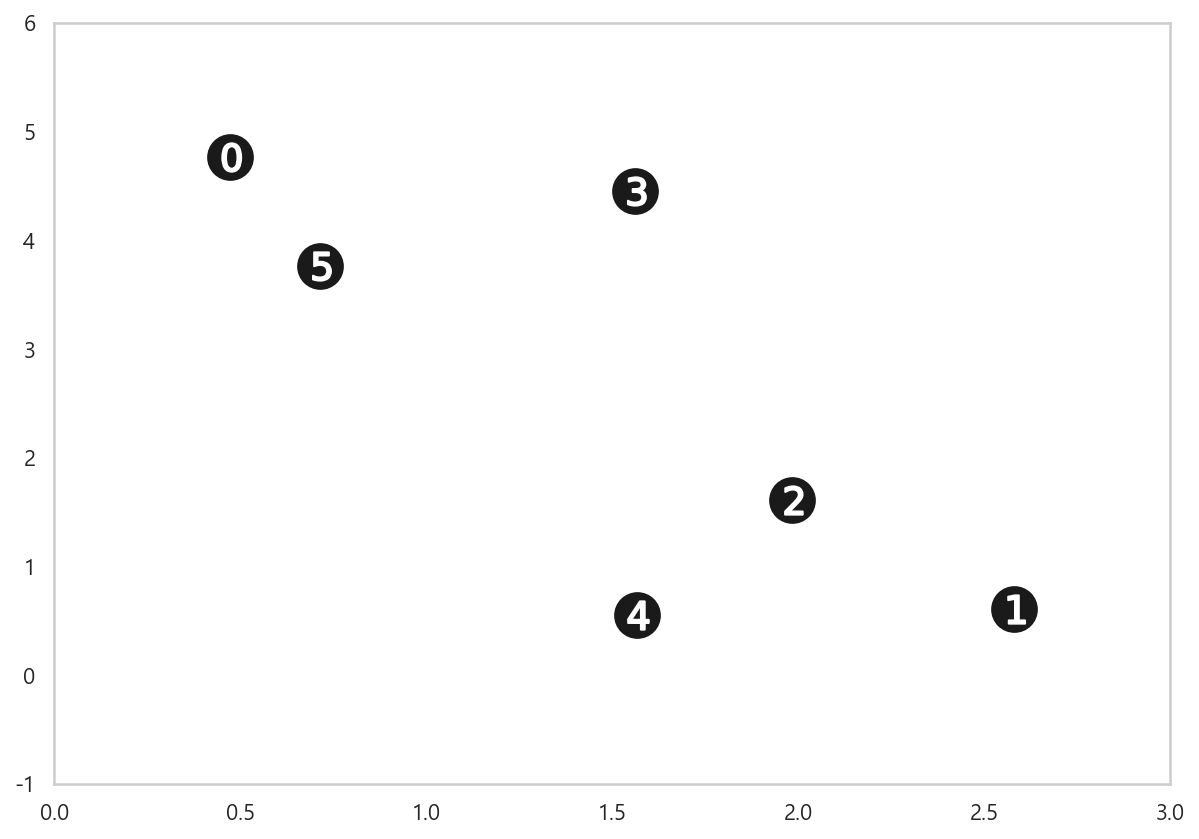

In [23]:
plt.figure(figsize=(10, 7))

for i in range(6) :
    
    # 배경 동그라미
    plt.scatter(x=test_center[i][0], y=test_center[i][1], s=500, color='k',
               edgecolor='k', alpha=1, marker='o')
    # 글씨
    plt.scatter(x=test_center[i][0], y=test_center[i][1], s=200, color='white',
               edgecolor='white', marker='$%d$' % unique_label[i])

plt.xlim(0, 3)
plt.ylim(-1, 6)
plt.grid(False)
plt.show() ;

## 4. 클러스링 평가 - 실루엣 평가

### Iris 데이터 로드 및 전처리

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

In [25]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
feature_names = [item[:-5] for item in iris.feature_names]
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [28]:
iris_df = pd.DataFrame(iris.data, columns=feature_names)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 클러스터링 모델 생성

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,
               random_state=13).fit(iris_df)
kmeans

KMeans(n_clusters=3, random_state=13)

In [31]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
iris_df['cluster'].value_counts()

1    62
0    50
2    38
Name: cluster, dtype: int64

### 실루엣 스코어 계산

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [34]:
avg_value = silhouette_score(iris.data, iris_df['cluster'])
avg_value

0.5528190123564091

In [35]:
print(silhouette_score(iris.data, kmeans.labels_))

0.5528190123564091


### 클러스터 갯수에 따른 실루엣 스코어

In [37]:
num_cluster = [2, 3, 4, 5, 6]

for num in num_cluster :
    kmeans = KMeans(n_clusters=num, init='k-means++', max_iter=300,
                   random_state=13).fit(iris_df)
    sil_score = silhouette_score(iris.data, kmeans.labels_)
    print("for n_cluster = {} The average silhouette score is : {}"
         .format(num, sil_score))

for n_cluster = 2 The average silhouette score is : 0.685788171261719
for n_cluster = 3 The average silhouette score is : 0.5528190123564091
for n_cluster = 4 The average silhouette score is : 0.48455767500242397
for n_cluster = 5 The average silhouette score is : 0.48113977781837935
for n_cluster = 6 The average silhouette score is : 0.35233400733271364


In [38]:
score_values = silhouette_samples(iris.data, iris_df['cluster'])
score_values

array([0.85295506, 0.81549476, 0.8293151 , 0.80501395, 0.8493016 ,
       0.74828037, 0.82165093, 0.85390505, 0.75215011, 0.825294  ,
       0.80310303, 0.83591262, 0.81056389, 0.74615046, 0.70259371,
       0.64377156, 0.77568391, 0.85101831, 0.70685782, 0.82030124,
       0.78418399, 0.82590584, 0.79297218, 0.7941134 , 0.77503635,
       0.79865509, 0.83346695, 0.84201773, 0.84364429, 0.81784646,
       0.81518962, 0.79899235, 0.76272528, 0.72224615, 0.82877171,
       0.83224831, 0.79415322, 0.84188954, 0.76856774, 0.85033231,
       0.84941579, 0.63900017, 0.78657771, 0.80023815, 0.74698726,
       0.80977534, 0.81340268, 0.81902059, 0.8182324 , 0.85209835,
       0.02672203, 0.38118643, 0.05340075, 0.59294381, 0.36885321,
       0.59221025, 0.28232583, 0.26525405, 0.34419223, 0.57829491,
       0.37478707, 0.58710354, 0.55107857, 0.48216686, 0.56310057,
       0.32459291, 0.55751057, 0.61072967, 0.46149897, 0.6115753 ,
       0.32909528, 0.58968904, 0.31046301, 0.49424779, 0.50004

In [39]:
print('avg_value : {}'.format(avg_value))
print('silhouette_samples() return 값의 shape', score_values.shape)

avg_value : 0.5528190123564091
silhouette_samples() return 값의 shape (150,)


## 5. 가상 데이터를 사용한 실루엣 평가 그래프

### 가상 데이터 생성

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                 center_box=(-10.0, 10.0), shuffle=True, random_state=1)

In [8]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1, 2, 3]), array([125, 125, 125, 125], dtype=int64))

### 실루엣 그래프 

For n_clusters =  2 The average silhouette_score is :  0.7049787496083262
For n_clusters =  3 The average silhouette_score is :  0.5882004012129721
For n_clusters =  4 The average silhouette_score is :  0.6505186632729437
For n_clusters =  5 The average silhouette_score is :  0.5745566973301872
For n_clusters =  6 The average silhouette_score is :  0.4387644975296138


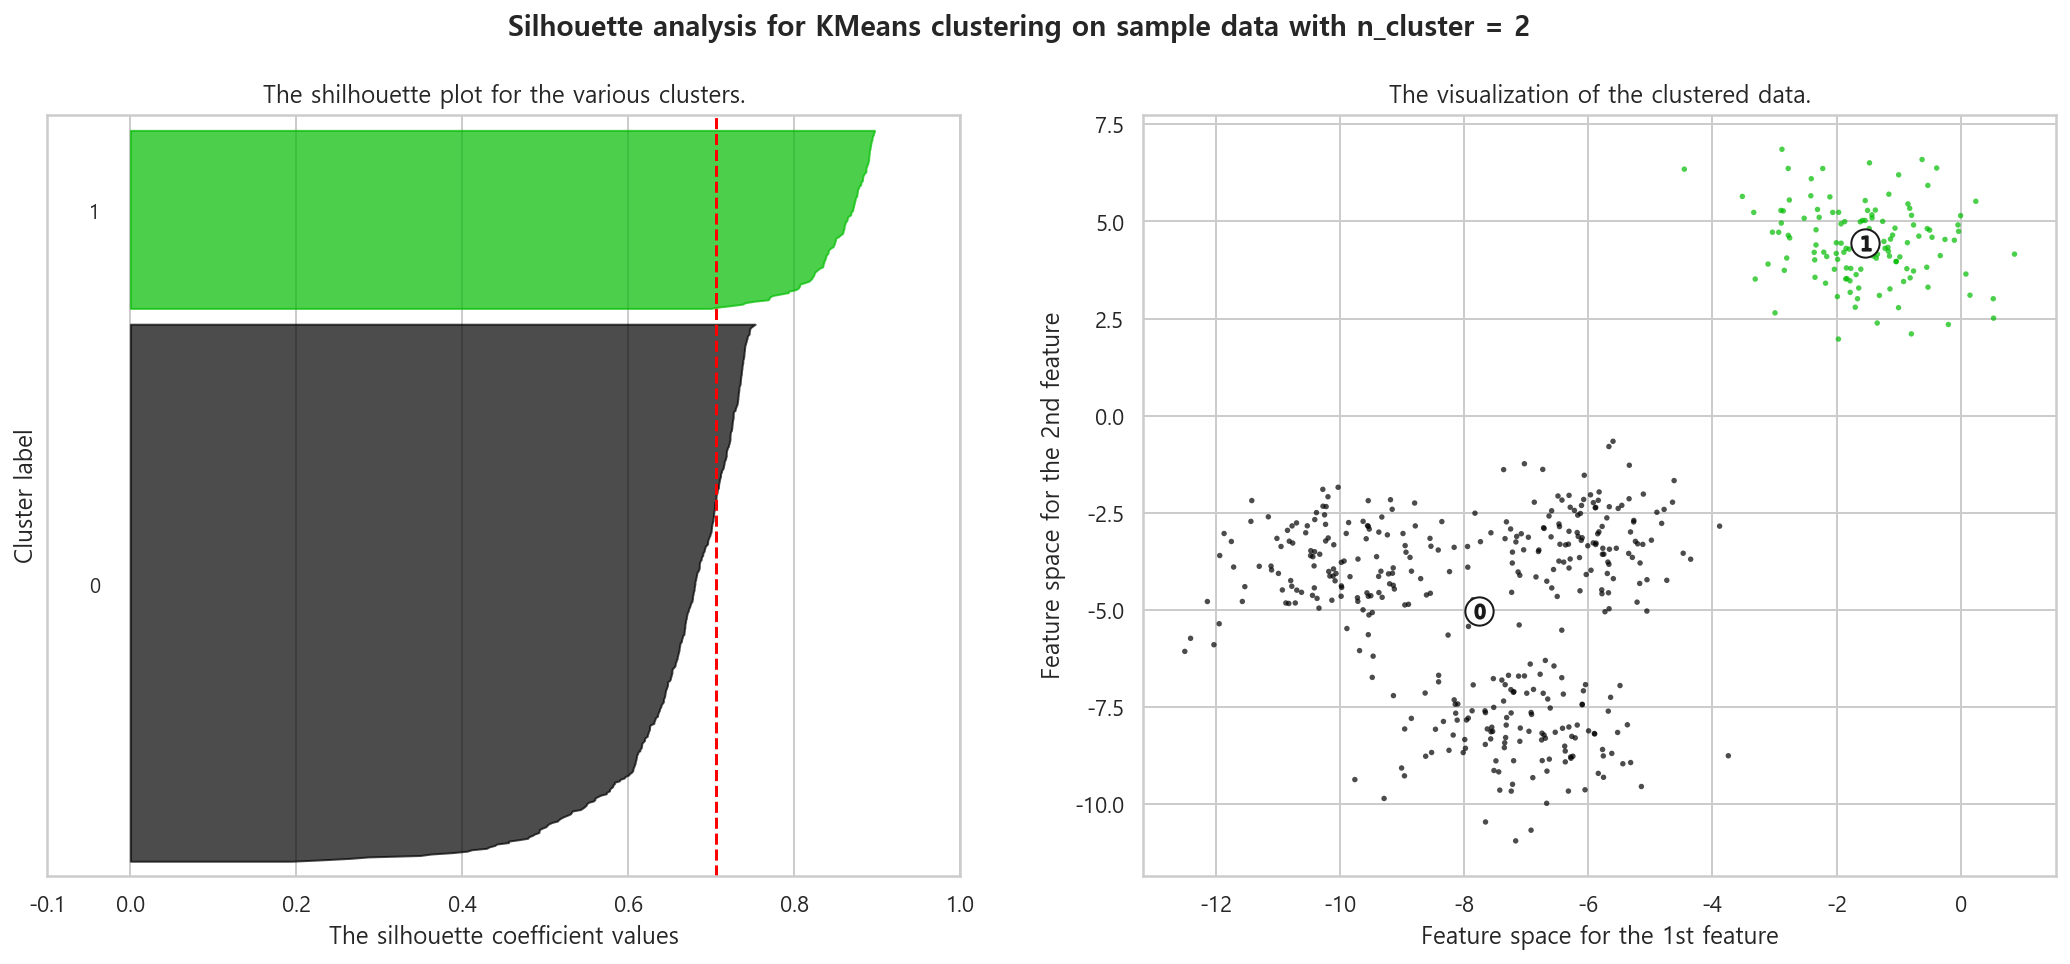

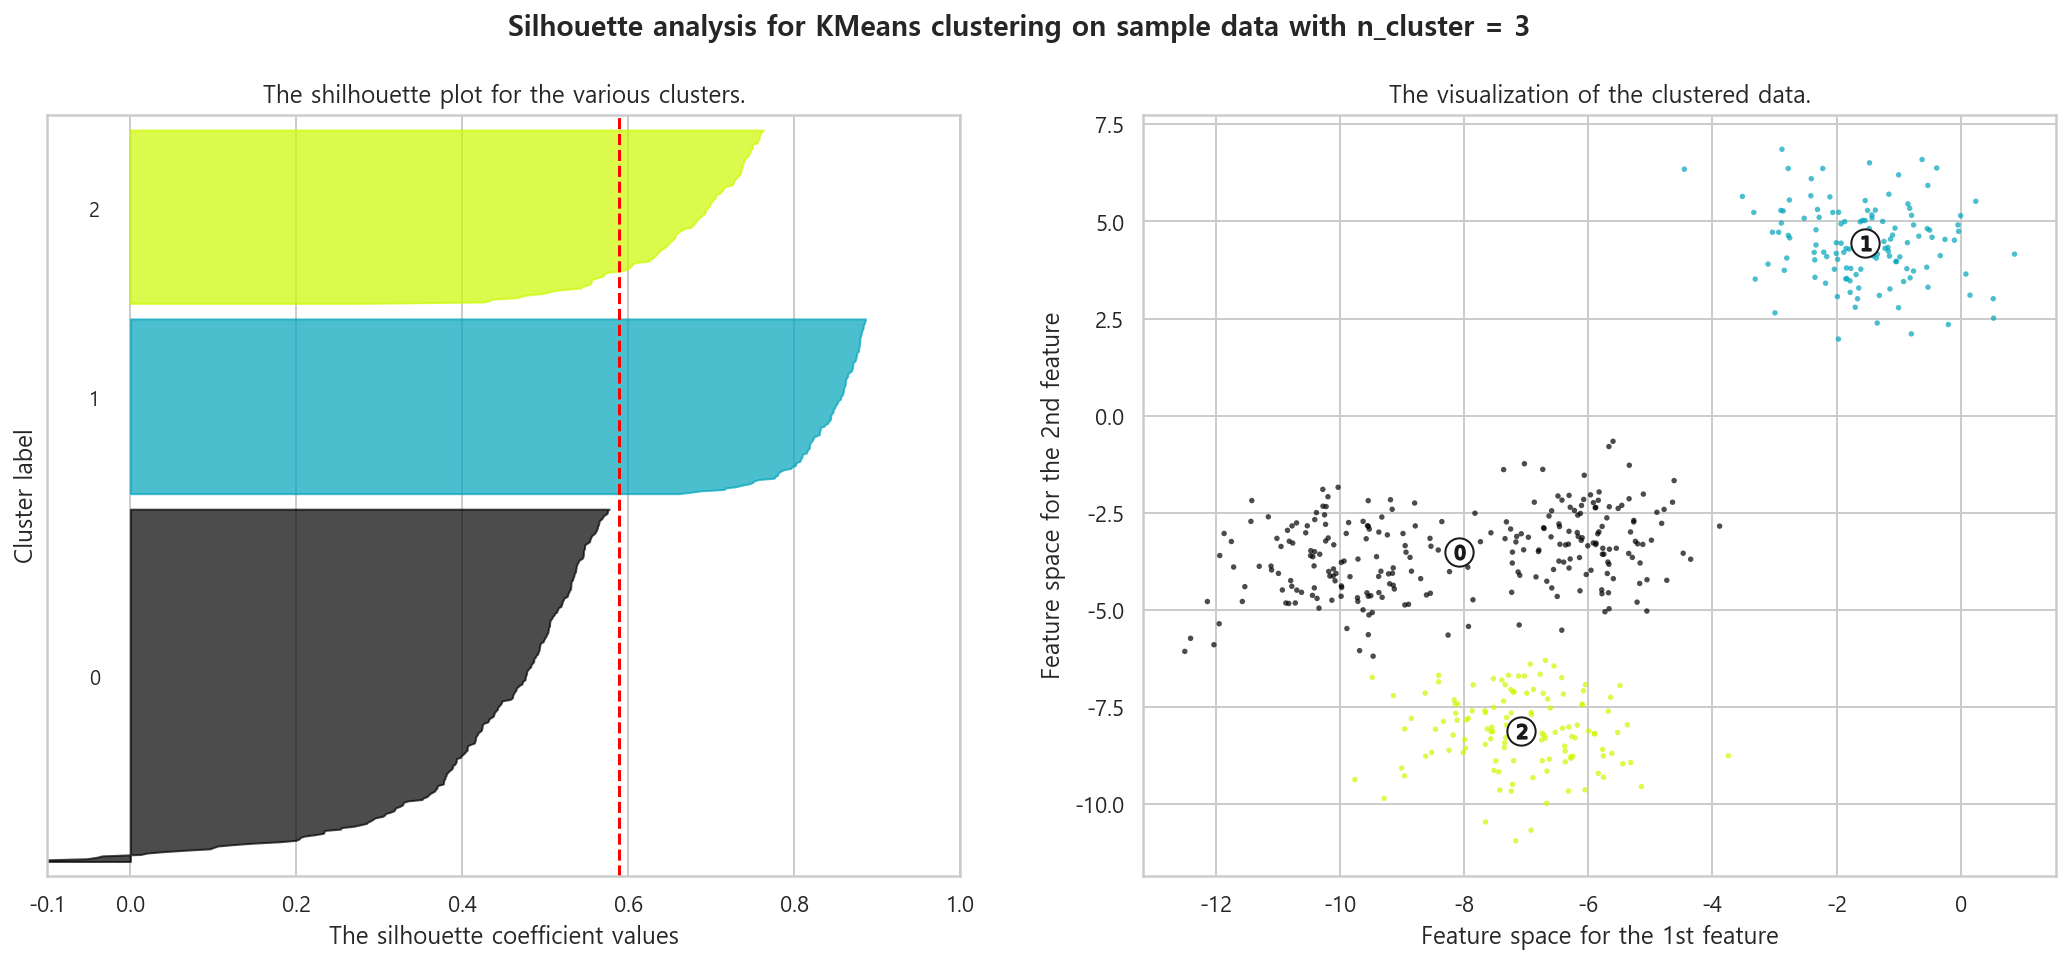

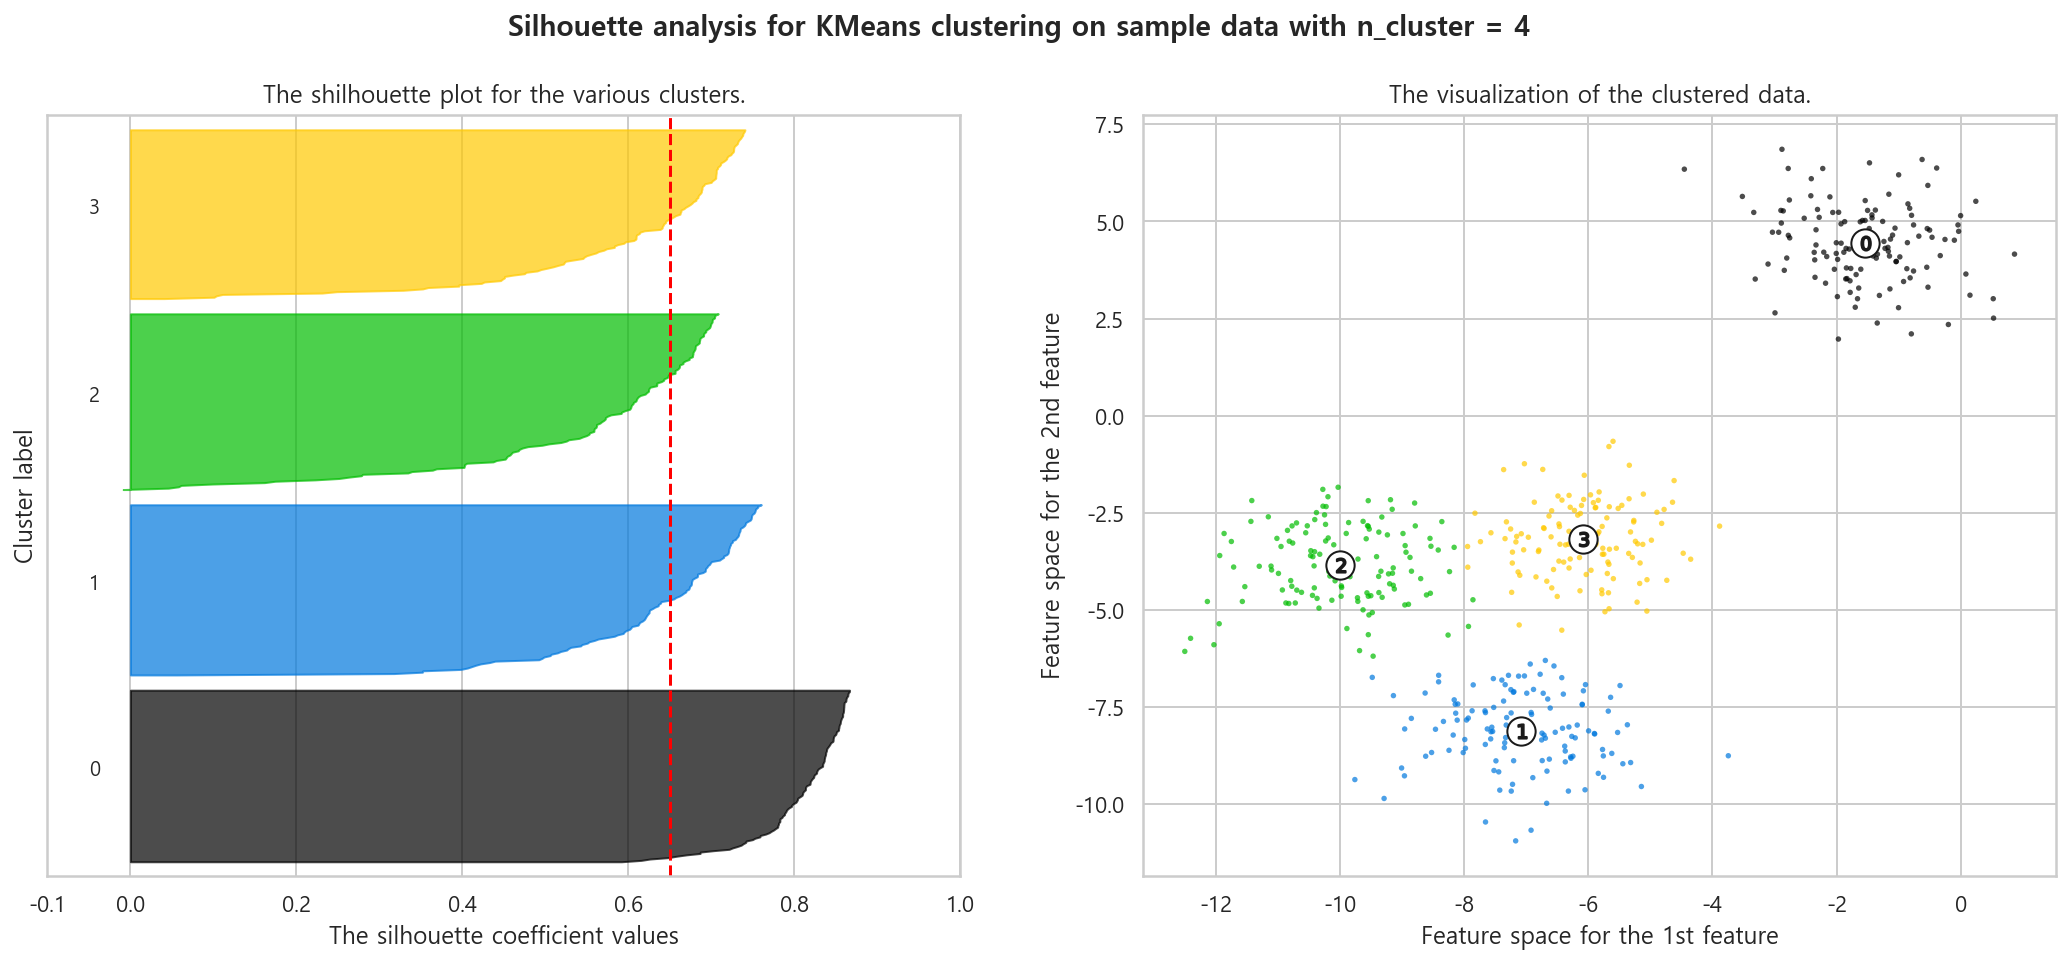

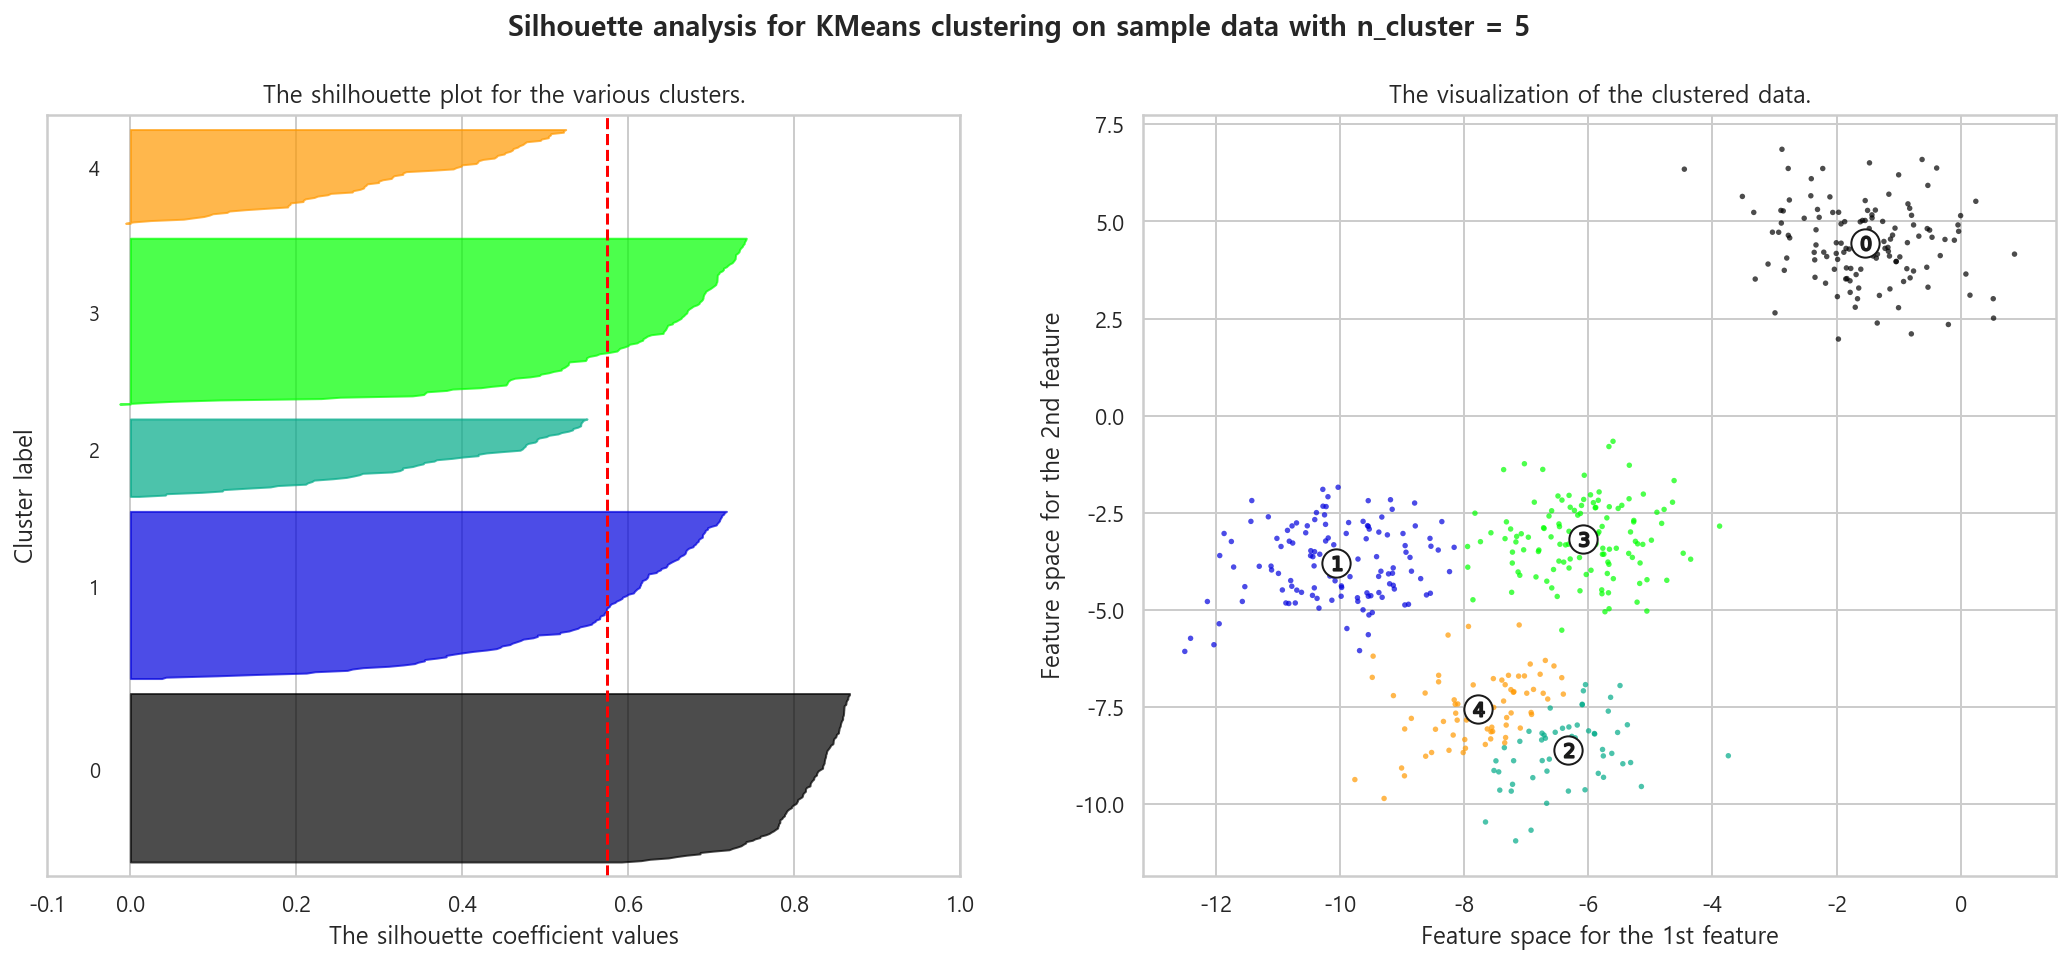

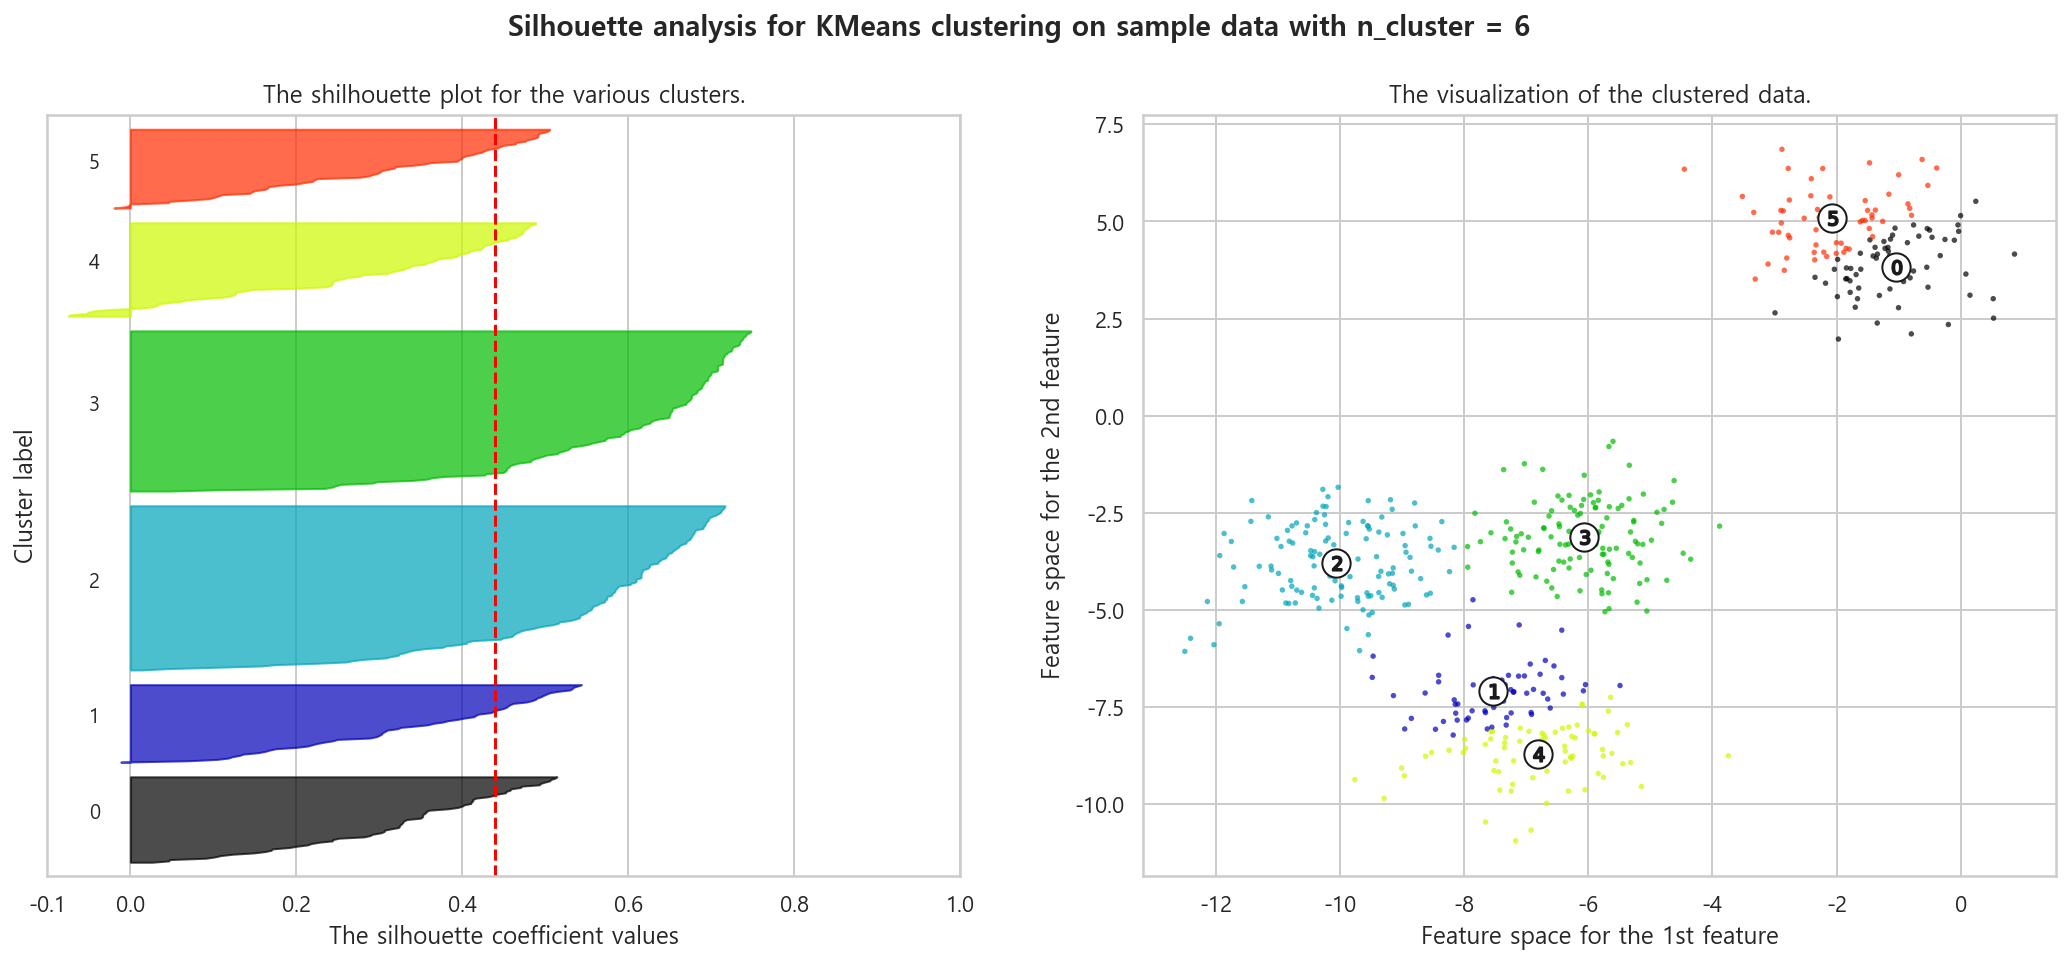

In [14]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters :
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
         "The average silhouette_score is : ", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters) :
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5  * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax1.set_title("The shilhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
               c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers) :
        ax2.scatter(c[0], c[1], marker='$%d$' % i , alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_cluster = %d" % n_clusters), fontsize=14, fontweight='bold')
    
plt.show() ;

In [15]:
size_cluster_i

60

In [17]:
np.arange(10, 70)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69])

In [21]:
ith_cluster_silhouette_values

array([-0.01974985, -0.00551474, -0.00127211, -0.00075088,  0.04588129,
        0.04732659,  0.07259077,  0.09471413,  0.10096148,  0.10589005,
        0.10990953,  0.14395585,  0.14614583,  0.14992541,  0.16218669,
        0.16546482,  0.16646625,  0.17885499,  0.20016596,  0.20874612,
        0.21953104,  0.22136239,  0.22535349,  0.27584714,  0.28702811,
        0.2914623 ,  0.29791944,  0.30094404,  0.30244725,  0.31065351,
        0.31842852,  0.31907082,  0.34034576,  0.35430774,  0.36197084,
        0.39338736,  0.39570922,  0.39906709,  0.39996978,  0.403794  ,
        0.41235378,  0.41719861,  0.42400479,  0.42709169,  0.43166687,
        0.44239443,  0.44554196,  0.44975359,  0.46391711,  0.46397249,
        0.47563371,  0.4778946 ,  0.48572026,  0.49022467,  0.49099782,
        0.49122004,  0.49262109,  0.50061962,  0.50417507,  0.5051482 ])

### 실루엣 평가 그래프 코드 리뷰

In [36]:
X, y = make_blobs(n_samples=500, n_features=2,
                 centers=4, cluster_std=1,
                 center_box=(-10.0, 10.0),
                 shuffle=True,
                 random_state=1)

For n_clusters =  2 The average silhouette_score is :  0.7049787496083262
10 385
[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 23

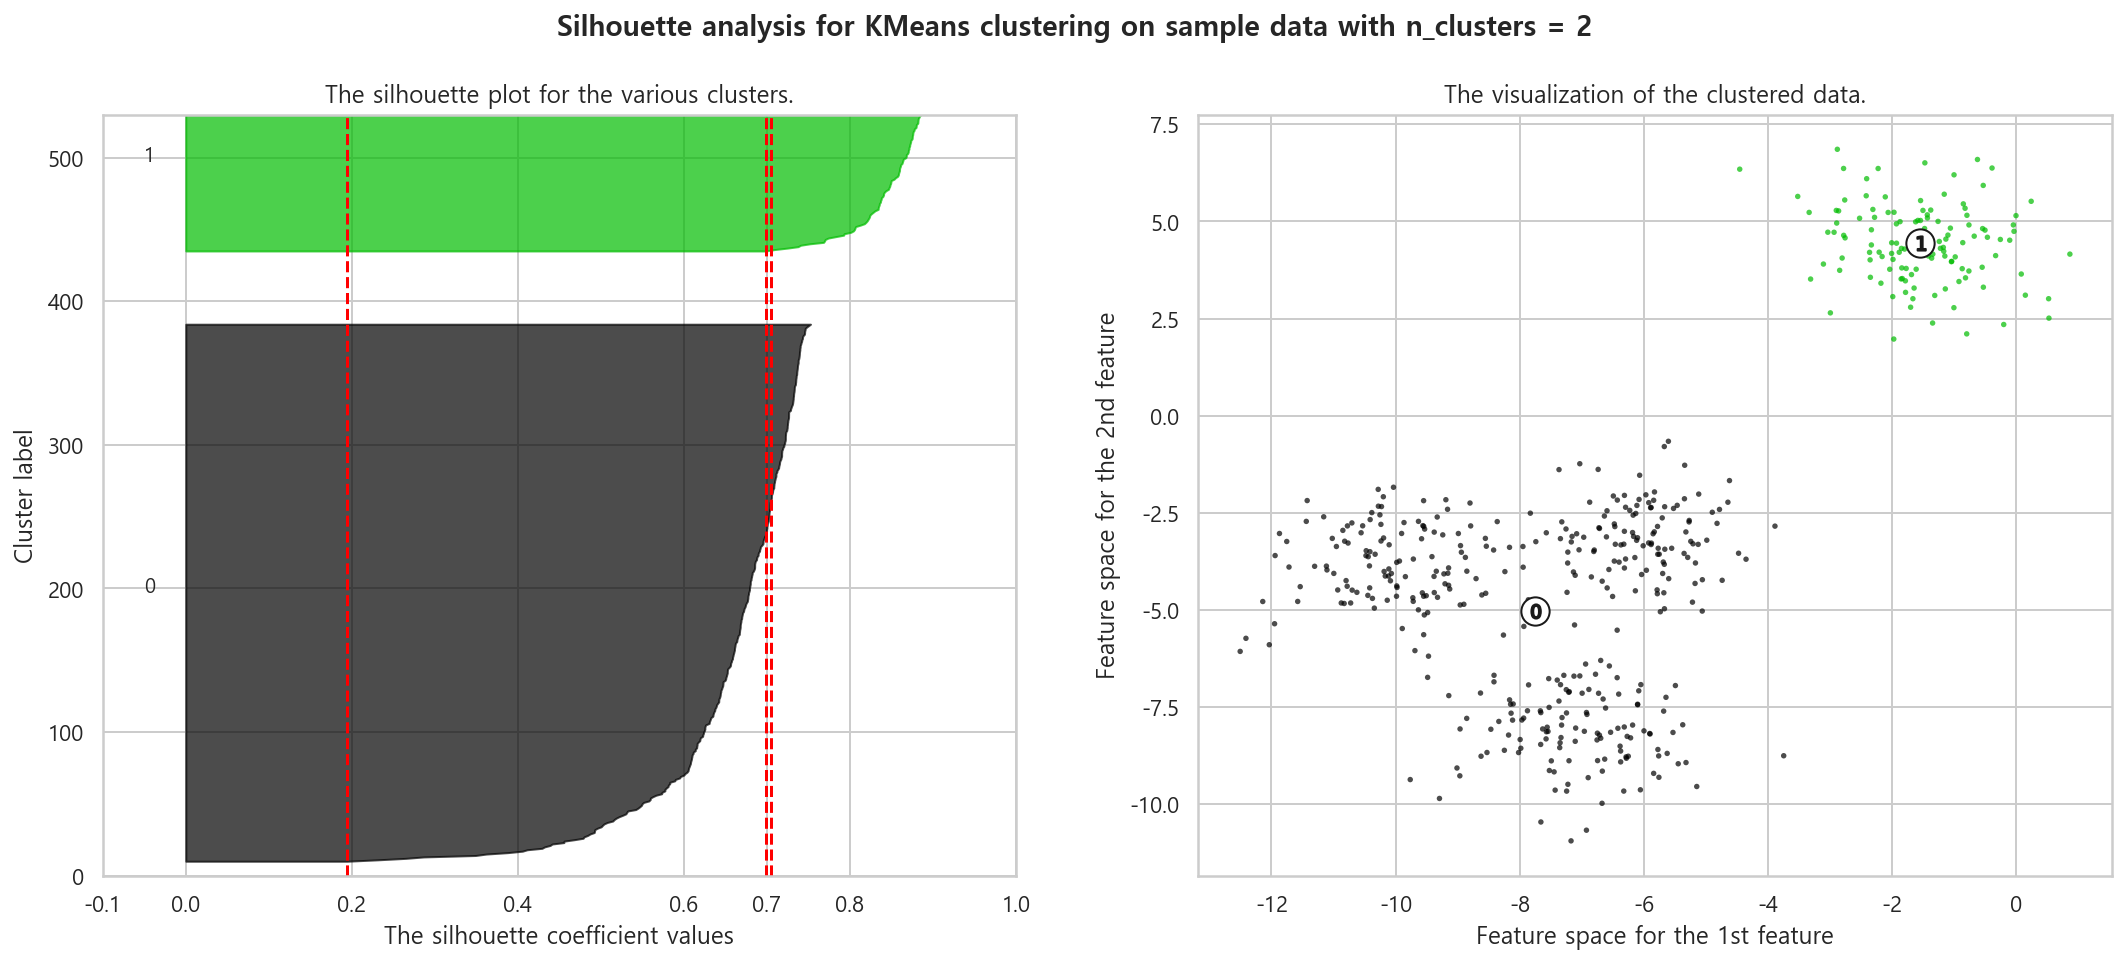

In [49]:
range_n_clusters = [2]

for n_clusters in range_n_clusters :
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10]) # 실루엣 사이 공간설정
    
    # 군집화
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # 실루엣 스코어 출력 샘플 전체의 평균값
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
         "The average silhouette_score is : ", silhouette_avg)
    
    # 각 샘플의 실루엣 스코어
    smaple_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters) :
        # 클러스터 i 의 실루엣 스코어만 정리 : i=2 이면 0,1 클러스터에 해당하는 샘플의
        # 스코어를 변수에 저장하고 정렬
        ith_cluster_silhouette_values = smaple_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        
        # 클러스터 i의 샘플갯수
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # 4개의 숫자가 나옴
        color = cm.nipy_spectral(float(i) / n_clusters)
        print(y_lower, y_upper)
        print(np.arange(y_lower, y_upper))
        print(ith_cluster_silhouette_values)
        # 실루엣 그래프를 그리는 부분
        # 실루엣 그래프를 그리는 방법은 기본적으로 fill_betweenx() 를 사용
        # 실루엣 스코어 그래프의 영역을 색으로 채운 것
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                         ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # 가운데 클러스터 번호가 있는 실루엣 플롯에 레이블 저장
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # 다음 플롯에 대한 새로운 y_lower 계산
        # 앞에서 y_upper = y_lower=10 + size_cluster_i 여기에 다시 +10
        y_lower = y_upper + 50
        ax1.axvline(x=ith_cluster_silhouette_values[0], color='red', linestyle="--")
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # 모든 값의 평균 실루엣 점수 수직선
    ax1.axvline(x=silhouette_avg, color='red', linestyle="--")
    
    # y ticks 제거, x ticks 설정
    #ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.7, 0.8, 1])
    
    # 2 번쨰 플롯 : 형성된 실제 클러스터
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               c=colors, edgecolor='k')
    
    # 클러스터에 라벨링
    # 군집화의 가운데 지점 변수저장
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
               c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers) :
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
    
plt.show() ;

In [71]:
ith_cluster_silhouette_values

array([0.69864732, 0.70953399, 0.72473643, 0.73759448, 0.74072899,
       0.75183363, 0.76832012, 0.76956214, 0.77028691, 0.77394916,
       0.78310605, 0.79250854, 0.79313296, 0.80120611, 0.80431434,
       0.80562204, 0.80620039, 0.80696245, 0.81266062, 0.81754642,
       0.81938256, 0.82091402, 0.82193897, 0.82303627, 0.82374663,
       0.82417097, 0.82602471, 0.82816278, 0.83036659, 0.8340838 ,
       0.83420519, 0.83468415, 0.8353995 , 0.83561556, 0.83682801,
       0.83708175, 0.83781688, 0.83800399, 0.83978163, 0.8405616 ,
       0.84066606, 0.84168348, 0.84355895, 0.84658274, 0.84710464,
       0.84805859, 0.84835702, 0.84916609, 0.8494793 , 0.84977701,
       0.85325286, 0.85495452, 0.85749158, 0.85844406, 0.85868961,
       0.8592512 , 0.85983631, 0.85984675, 0.86020089, 0.86094763,
       0.86119506, 0.86288001, 0.86337637, 0.86394454, 0.86439567,
       0.86747196, 0.86801732, 0.86803419, 0.86976029, 0.87040467,
       0.87052001, 0.87122598, 0.8712327 , 0.8720373 , 0.87218

In [50]:
len(ith_cluster_silhouette_values)

125

In [58]:
y = np.linspace(0, 125, 125)
len(y)

125

In [59]:
len(ith_cluster_silhouette_values)

125

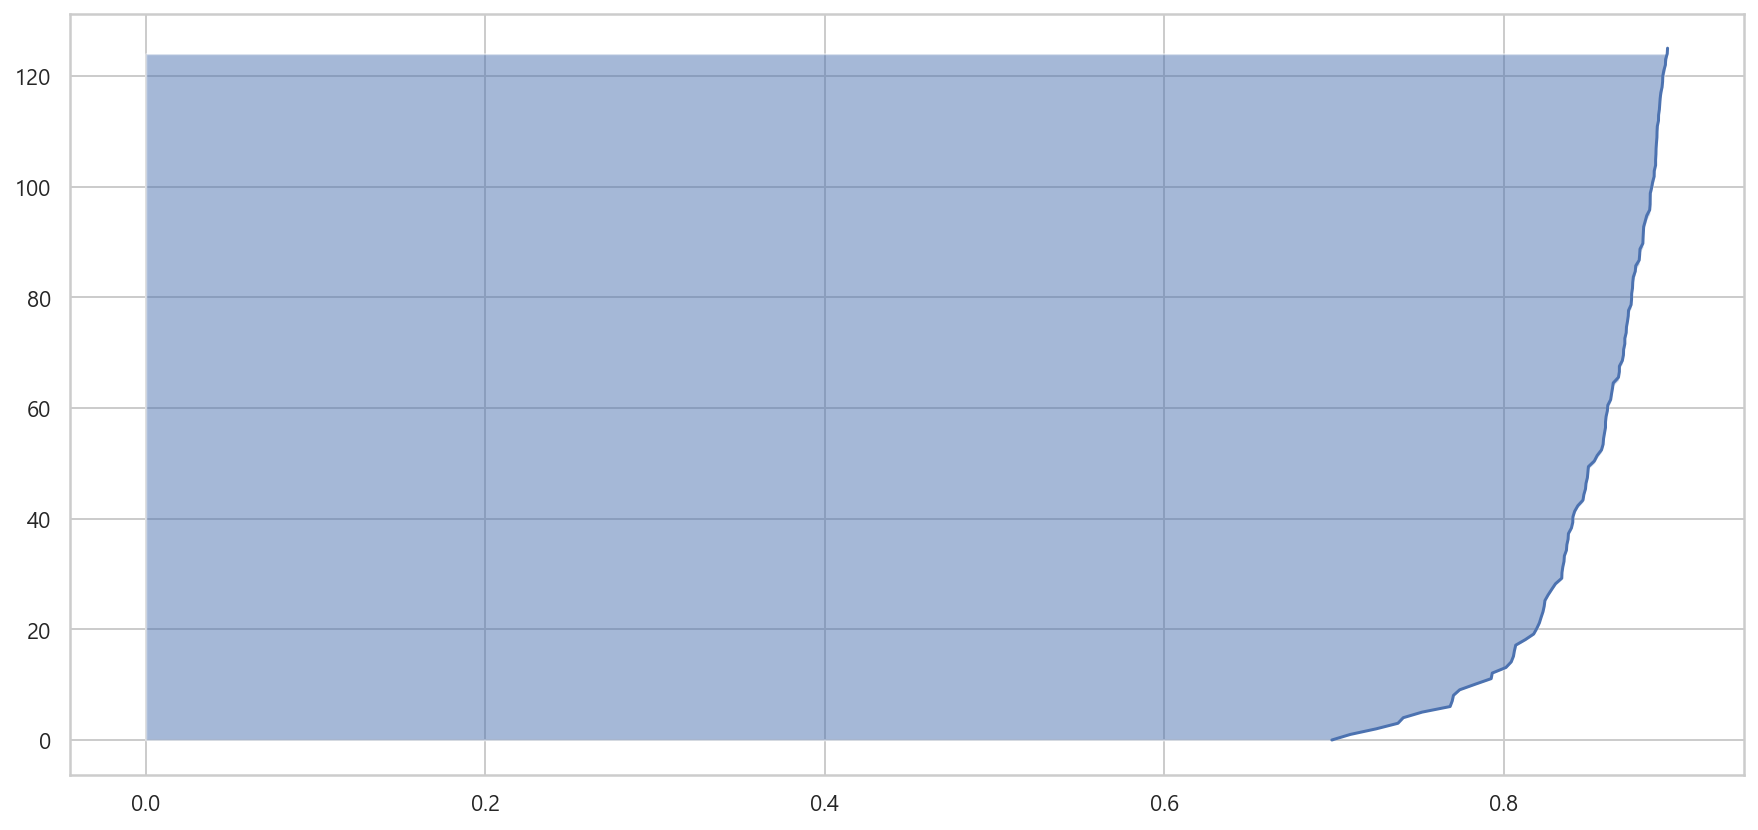

In [70]:
plt.figure(figsize=(15, 7))
plt.plot(ith_cluster_silhouette_values, y)
plt.fill_betweenx(np.arange(0, 125), ith_cluster_silhouette_values, alpha=0.5)
plt.show() ;

In [91]:
round(np.linspace(0, 1, 20)[1], 3)

0.053

In [94]:
ticks_range = np.linspace(0, 1, 20)

new_ticks_range = [round(item, 3) for item in ticks_range]
new_ticks_range = np.array(new_ticks_range)
new_ticks_range

array([0.   , 0.053, 0.105, 0.158, 0.211, 0.263, 0.316, 0.368, 0.421,
       0.474, 0.526, 0.579, 0.632, 0.684, 0.737, 0.789, 0.842, 0.895,
       0.947, 1.   ])

## 6. 클러스터링 평가 - Sil Score and WCSS Score 비교

### Iris 데이터 임포트, 전처리

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
new_feature_names = [item[:-5] for item in iris.feature_names]
new_feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [7]:
iris_df = pd.DataFrame(data=iris.data, columns=new_feature_names)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### feature 2개로 KMeans 테스트

In [8]:
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [9]:
model = KMeans(n_clusters=3)
model.fit(feature)

KMeans(n_clusters=3)

### kmeans 모델의 속성들

In [10]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [12]:
model.predict(feature)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 클러스터 결과

In [14]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


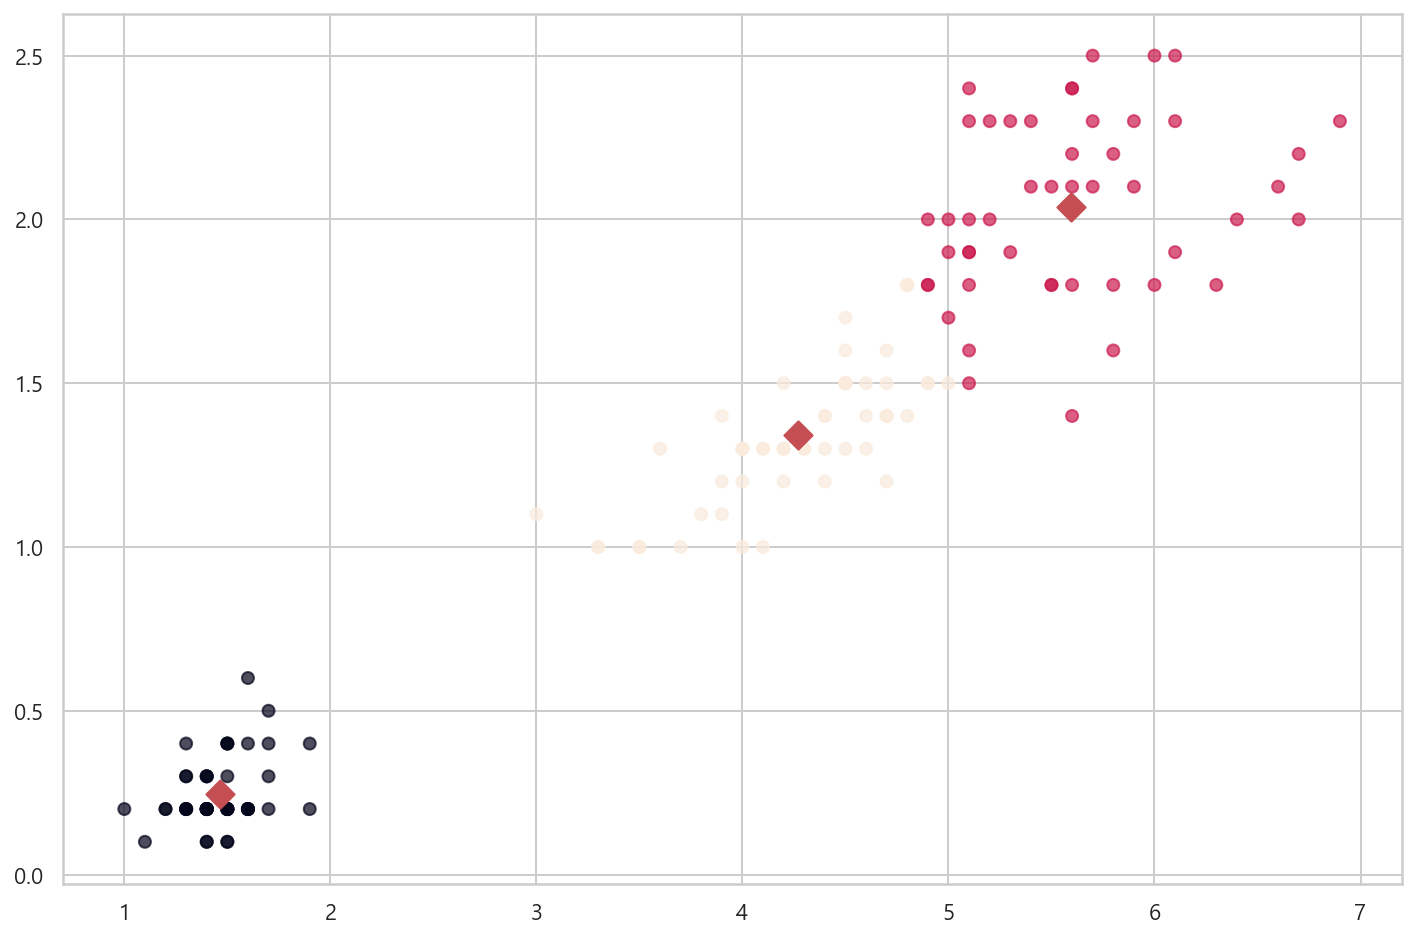

In [22]:
centers = pd.DataFrame(model.cluster_centers_,
                      columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'],
           c=feature['cluster'], alpha=0.7)
plt.scatter(center_x, center_y, s=100, marker='D', c='r')
plt.show() ;

### 전체 feature를 사용한 kmeans 테스트

In [63]:
iris_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200,
                    random_state=0).fit(iris_df)
iris_kmeans

KMeans(max_iter=200, n_clusters=3, random_state=0)

In [65]:
iris_df['cluster'] = iris_kmeans.labels_
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### 클러스터의 분포

In [67]:
iris_df['cluster'].value_counts()

2    62
1    50
0    38
Name: cluster, dtype: int64

### 클러스터 갯수에 따른 실루엣 스코어 계산

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [70]:
avg_value = silhouette_score(iris.data, iris_df['cluster'])
avg_value

0.5528190123564091

In [87]:
range_n_clusters = range(2, 15)
result = []

for cluster in range_n_clusters :
    iris_kmeans = KMeans(n_clusters=cluster, init='k-means++', max_iter=200,
                        random_state=0)
    cluster_labels = iris_kmeans.fit_predict(iris_df)
    avg_value = silhouette_score(iris.data, cluster_labels)
    result.append([cluster, avg_value])

result_pd = pd.DataFrame(result, columns=['n_cluster', 'sil_score'])
result_pd

,n_cluster,sil_score
0,2,0.685788
1,3,0.522637
2,4,0.381815
3,5,0.366084
4,6,0.357225
5,7,0.338631
6,8,0.340348
7,9,0.304777
8,10,0.294696
9,11,0.267645


### 실루엣 스코어의 히트맵 확인

In [88]:
pivot_km = pd.pivot_table(result_pd, index='n_cluster', values='sil_score')
pivot_km

,sil_score
n_cluster,
2,0.685788
3,0.522637
4,0.381815
5,0.366084
6,0.357225
7,0.338631
8,0.340348
9,0.304777
10,0.294696


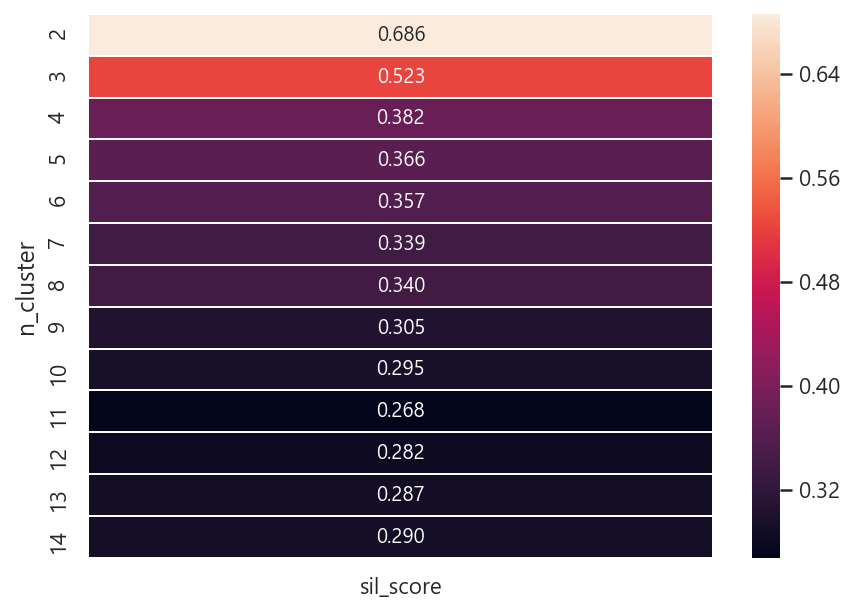

In [107]:
plt.figure(figsize=(7, 5))
kmeans_heat = sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f',
                          cmap=sns.cm._rocket_lut)
kmeans_heat.set_ylim(13, 0)
plt.show()

### 클러스터 k 값의 변화에 따른 실루엣 스코어, WCSS 스코어 그래프

In [232]:
def visualization_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300) :

    range_n_clusters = range(2, 15)
    result = []

    for cluster in range_n_clusters :
        kmeans = KMeans(n_clusters=cluster, init=param_init,
                            n_init=param_n_init, max_iter=param_max_iter,
                            random_state=0)
        
        cluster_labels = kmeans.fit_predict(data)
        avg_value = silhouette_score(data, cluster_labels)
        wcss = kmeans.inertia_
        result.append([cluster, avg_value, wcss])
    
    result_array = np.array(result)
    result_pd = pd.DataFrame(result_array[:, :2], columns=['n_cluster', 'sil_score'])
    pivot_result = pd.pivot_table(result_pd, index='n_cluster', values='sil_score')
    
    plt.figure(figsize=(7, 15))
    plt.subplot(311)
    sil_score_heat = sns.heatmap(pivot_result, annot=True, linewidth=.5, fmt='.4f',
               cmap=sns.cm._rocket_lut)
    sil_score_heat.set_ylim(13, 0)
    plt.title("<sil_score 와 k 값> - heatmap", fontsize=15)
    
    plt.subplot(312)
    plt.plot(pivot_result)
    plt.plot(pivot_result, 'ro')
    plt.xticks(np.arange(2, 15))
    plt.title("<sil_score 와 k 값> - plot", fontsize=15)
    
    plt.subplot(313)
    plt.plot(result_array[:, 2])
    plt.plot(result_array[:, 2], 'ro')
    plt.title("<wcss 와 k 값> - plot", fontsize=15)
    
    plt.tight_layout()
    plt.show()

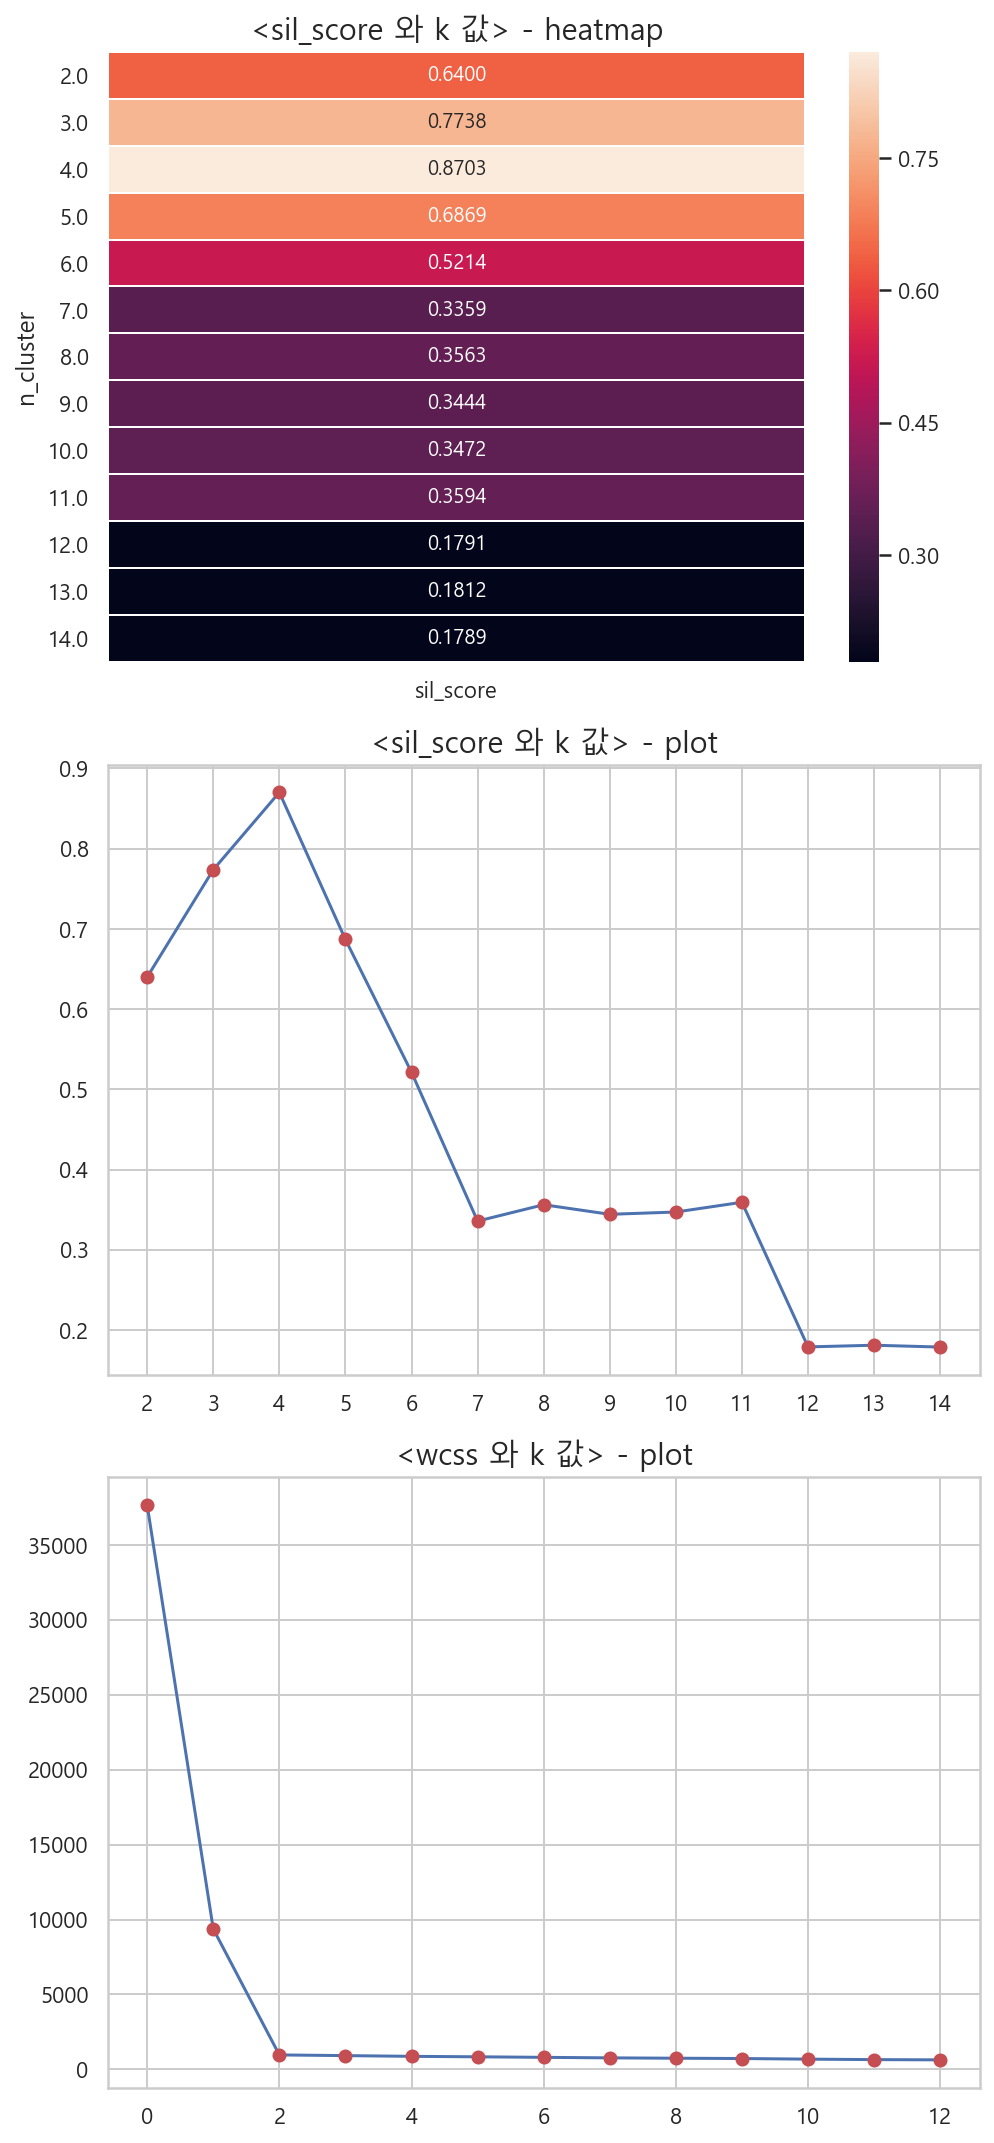

In [233]:
visualization_silhouette_layer(cluster_df.iloc[:, :-1])

## 7. 샘플 데이터를 사용한 클러스터링 및 평가 그래프

In [158]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [181]:
X, y = make_blobs(n_samples=500, n_features=3, centers=5,
                 cluster_std=0.7, random_state=1, shuffle=True,
                 center_box=(-10.0, 10))

In [182]:
X.shape

(500, 3)

In [183]:
y.shape

(500,)

In [184]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4]), array([100, 100, 100, 100, 100], dtype=int64))

For n_clusters =  2 The average silhouette_score is :  0.5864838500140318
For n_clusters =  3 The average silhouette_score is :  0.6969955077970117
For n_clusters =  4 The average silhouette_score is :  0.7739721310783171
For n_clusters =  5 The average silhouette_score is :  0.7684964970692941
For n_clusters =  6 The average silhouette_score is :  0.6477332796163866


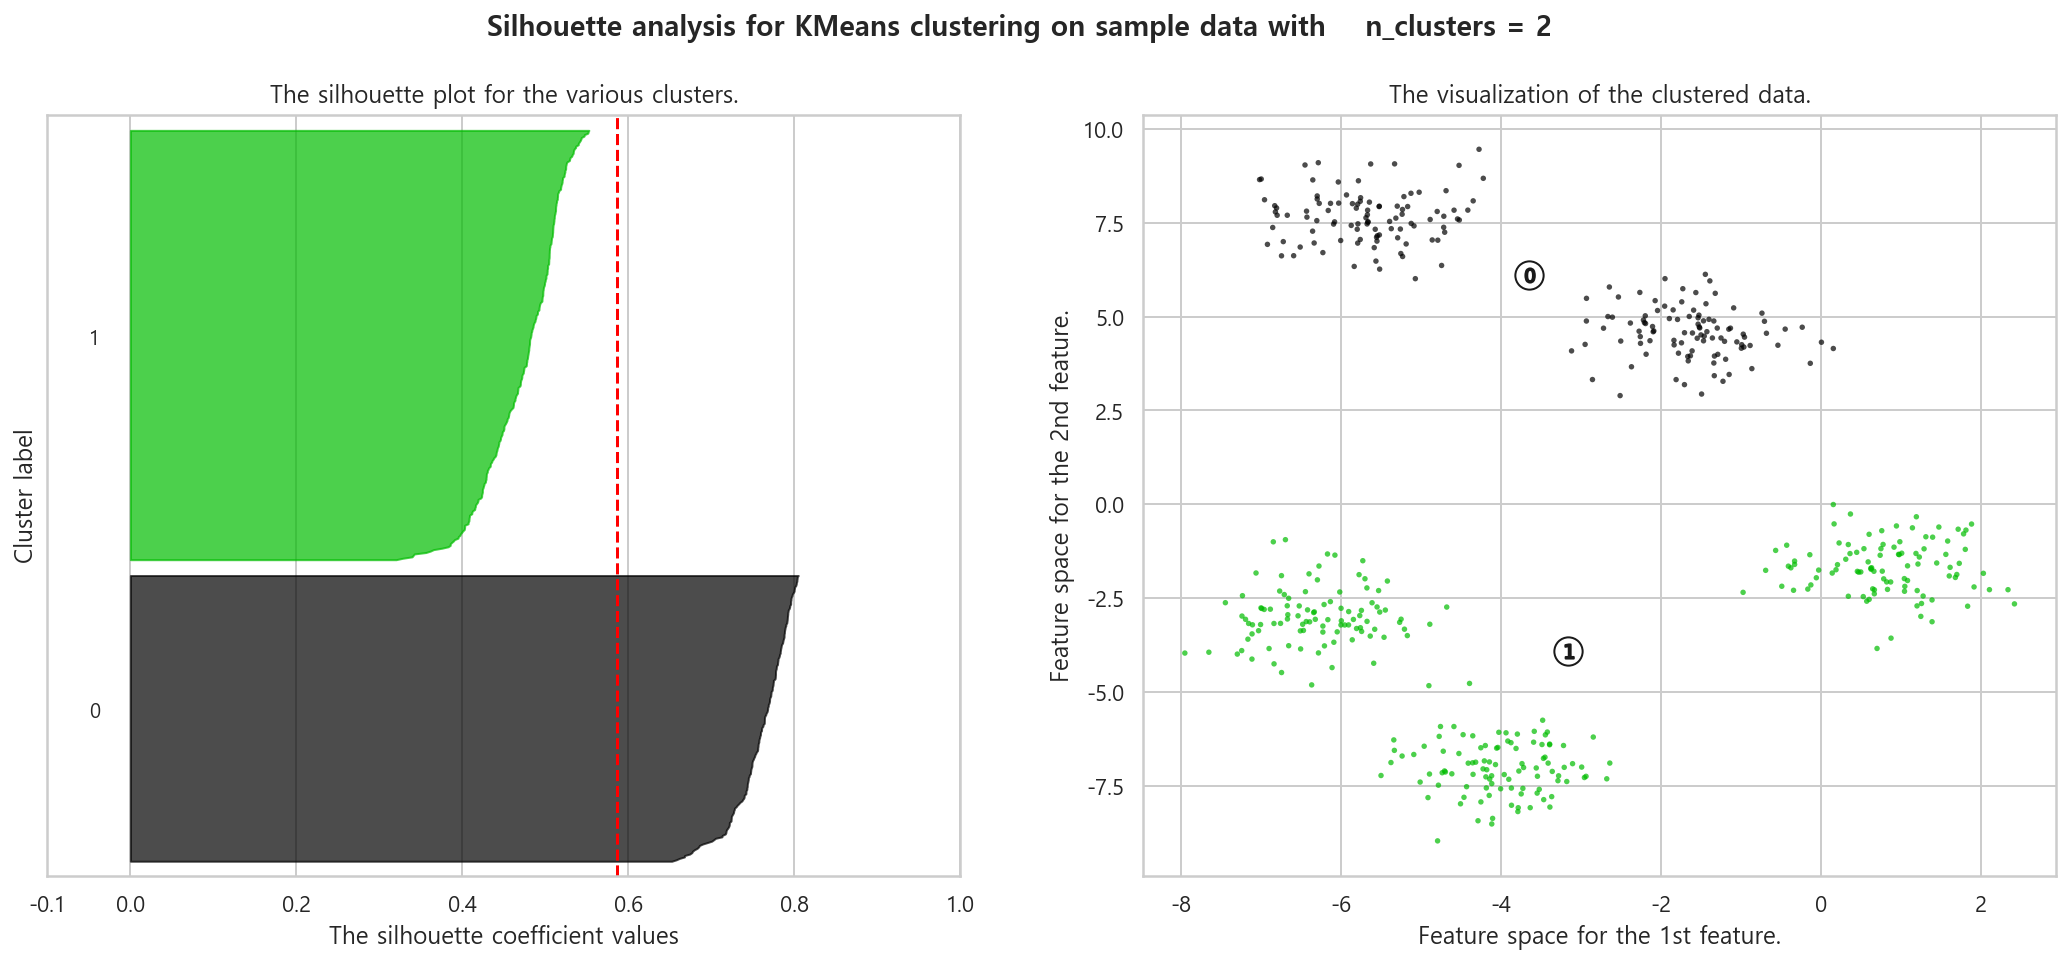

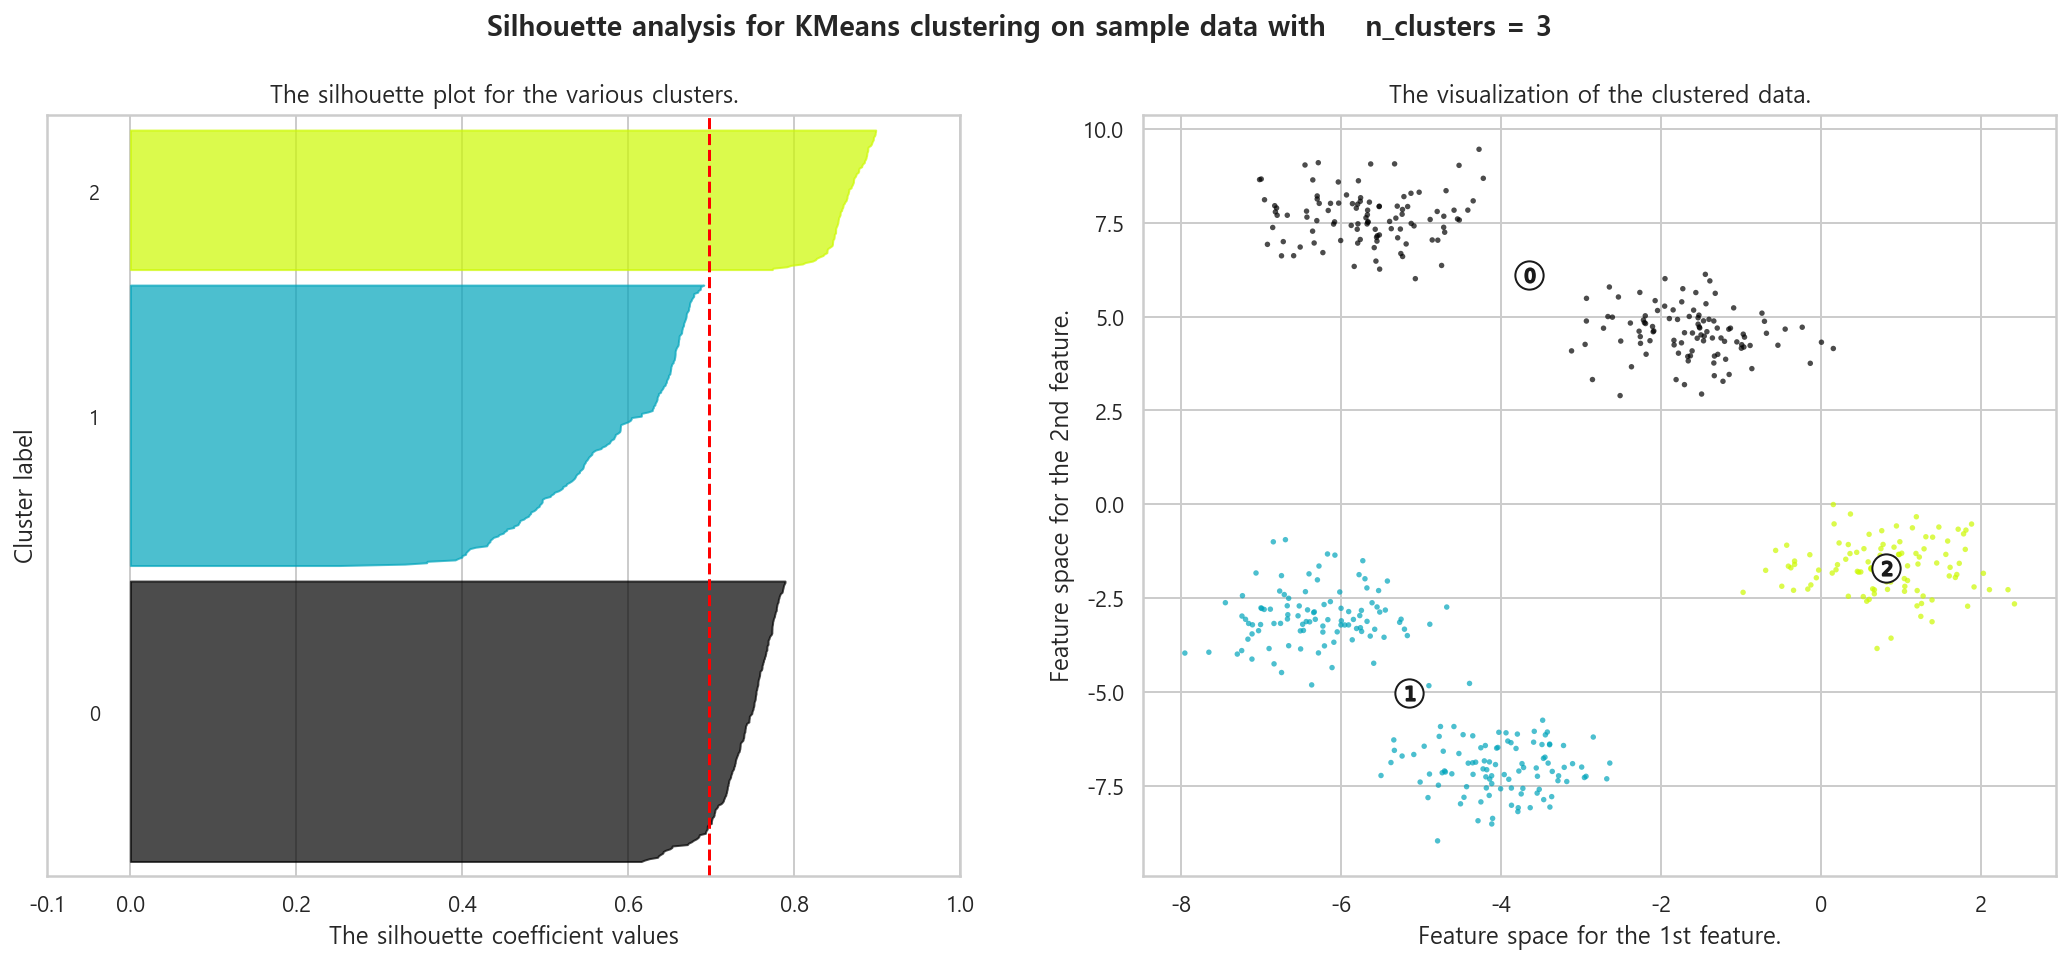

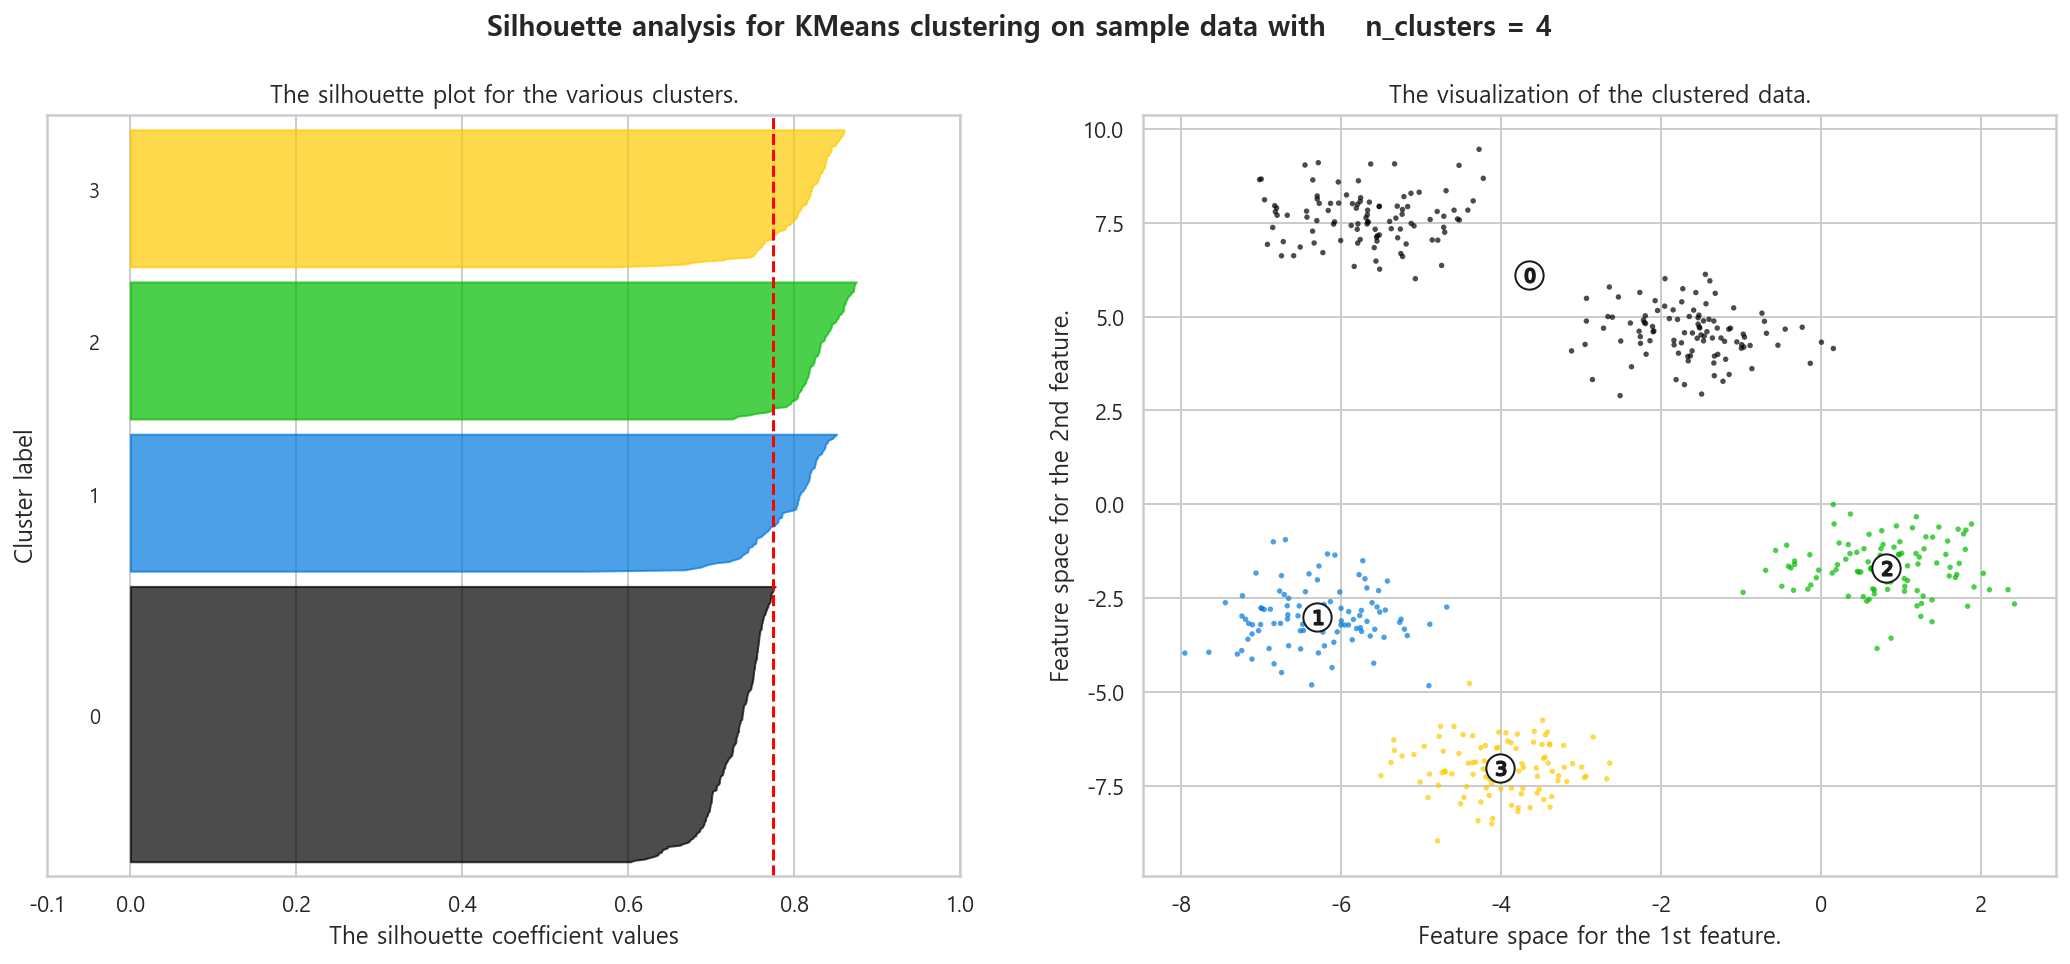

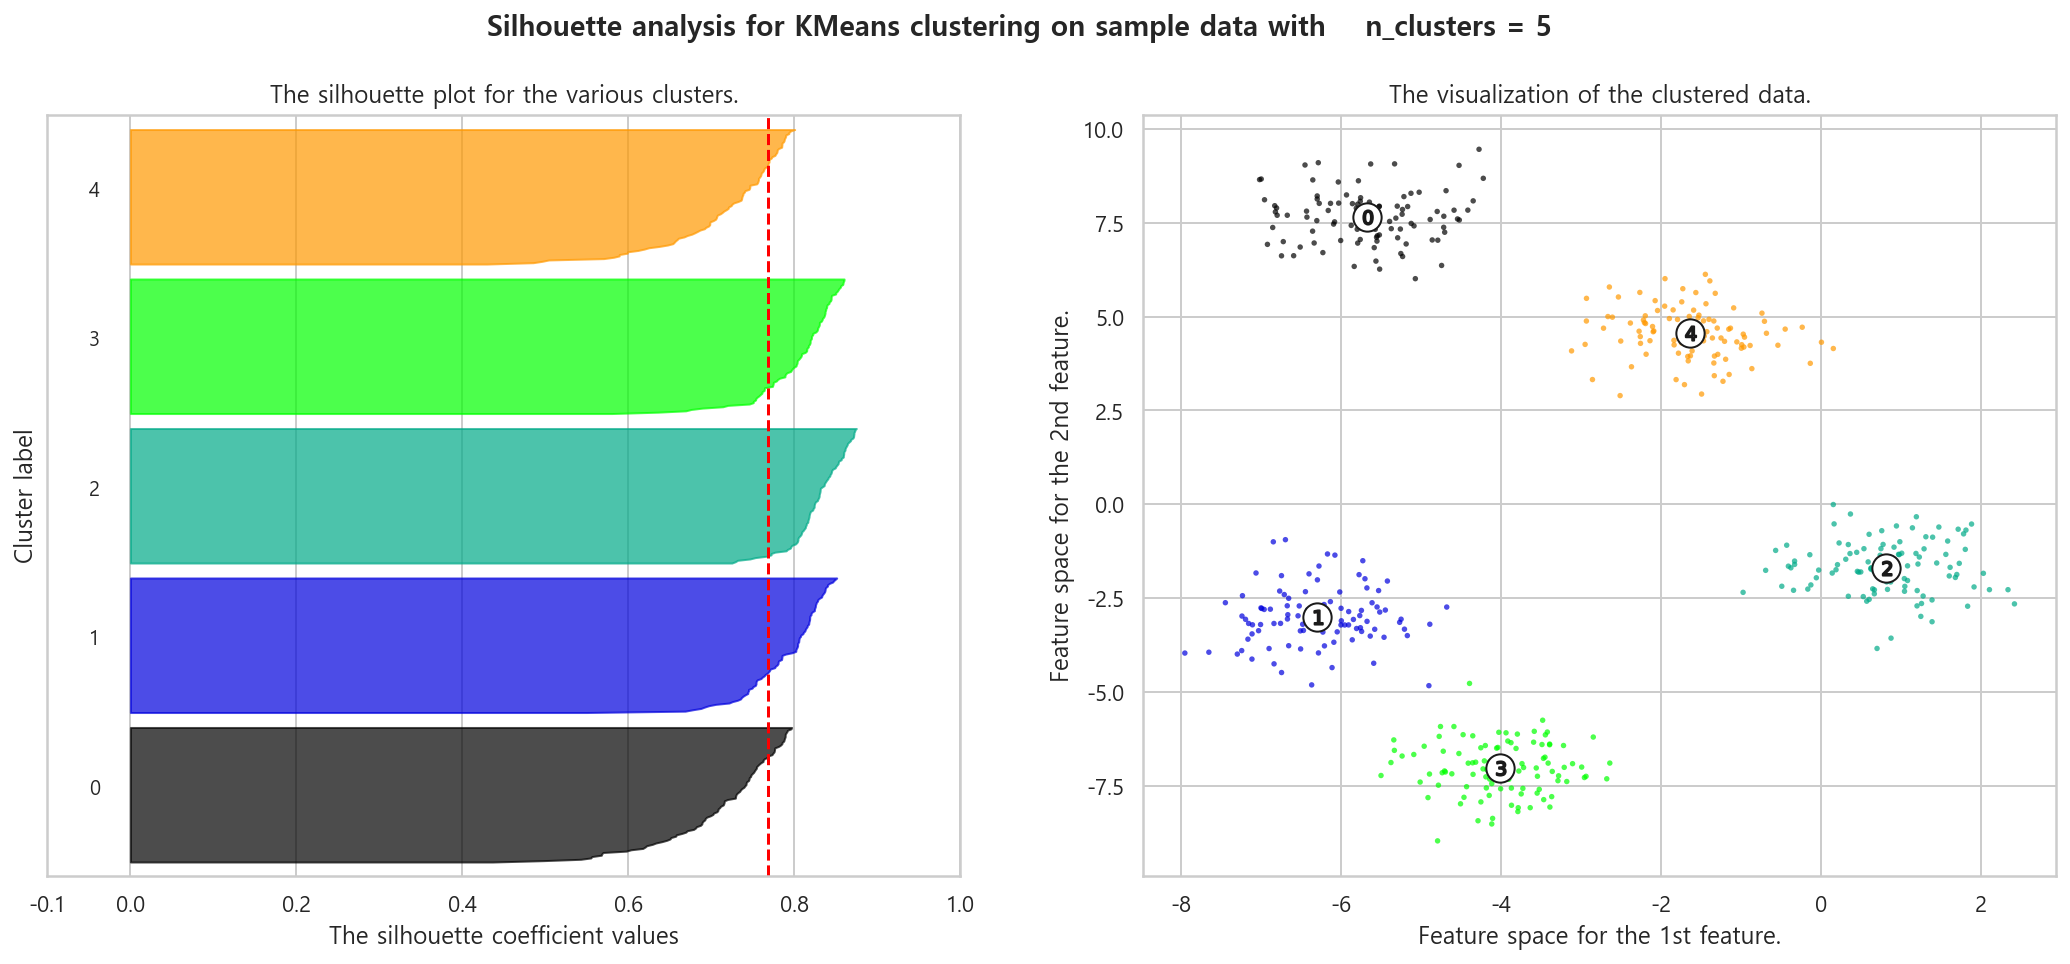

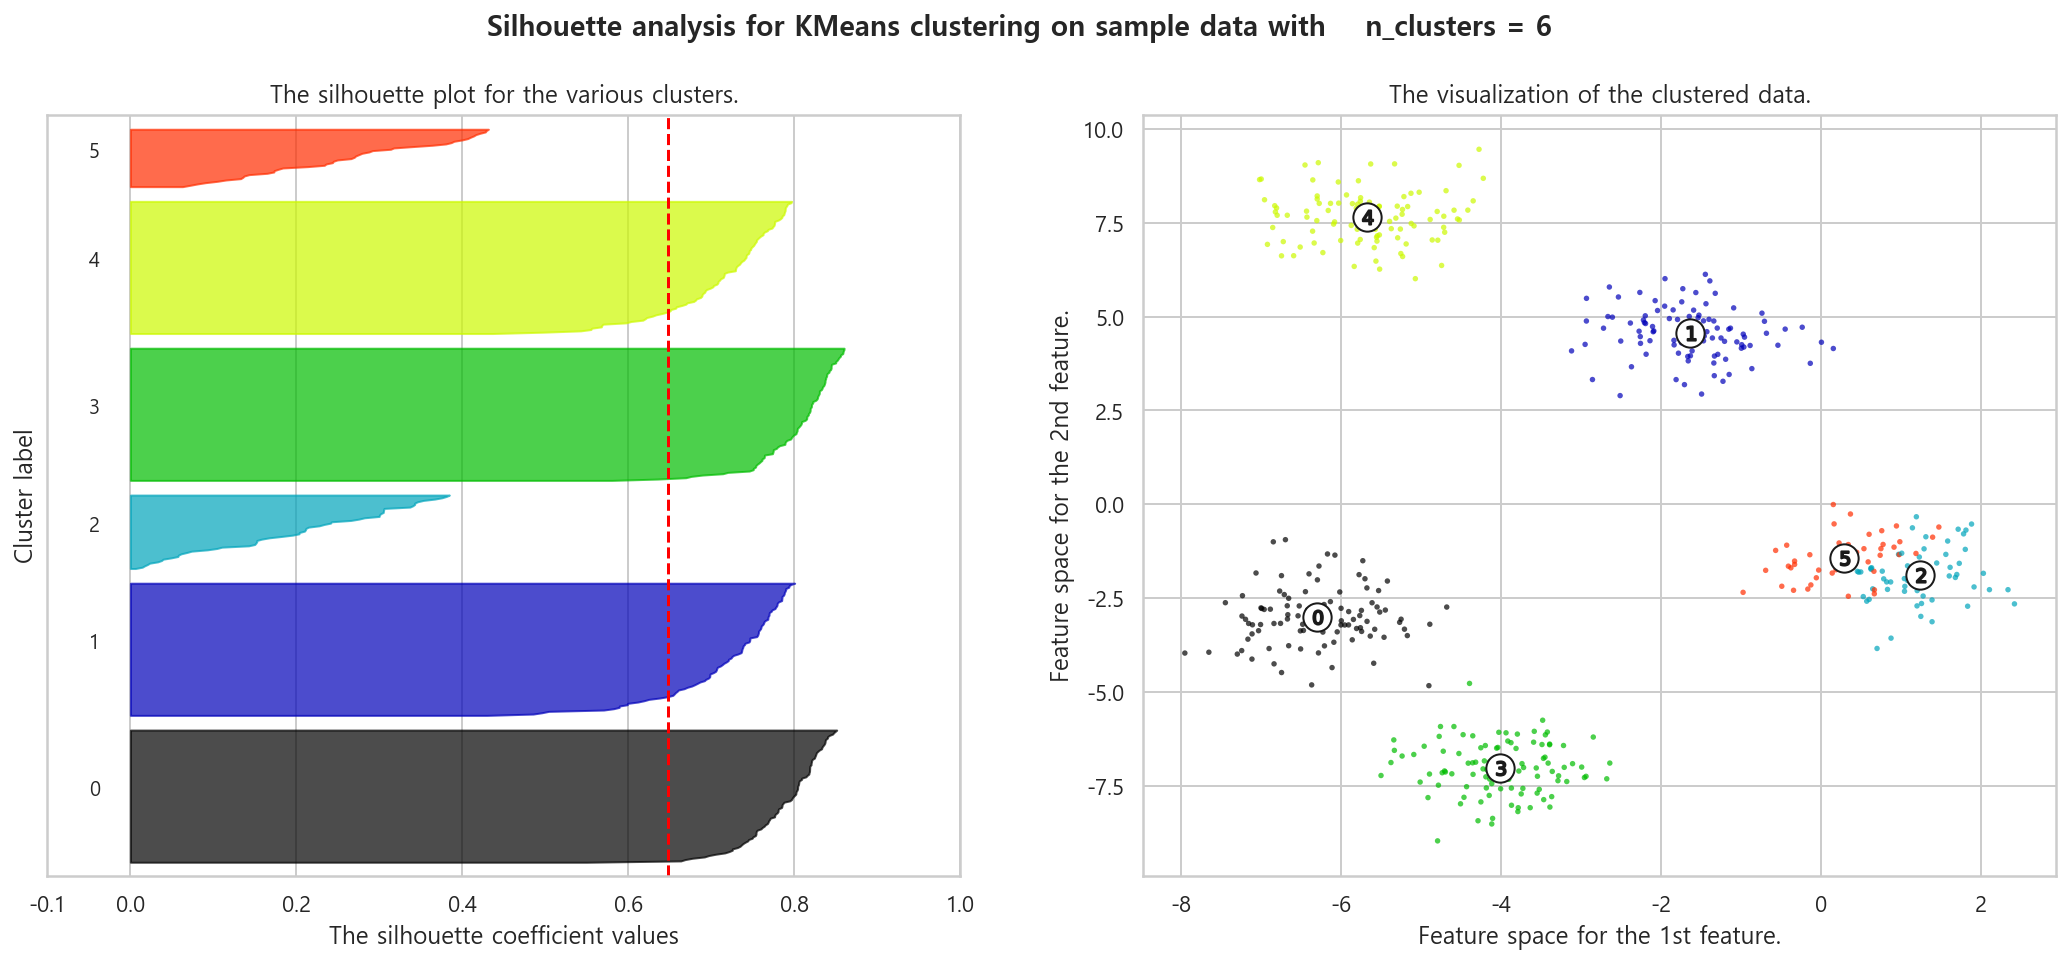

In [185]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters :
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = ", n_clusters,
         "The average silhouette_score is : ", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters) :
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color='red', linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
               c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers) :
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature.")
    ax2.set_ylabel("Feature space for the 2nd feature.")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with\
    n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
    
plt.show() ;

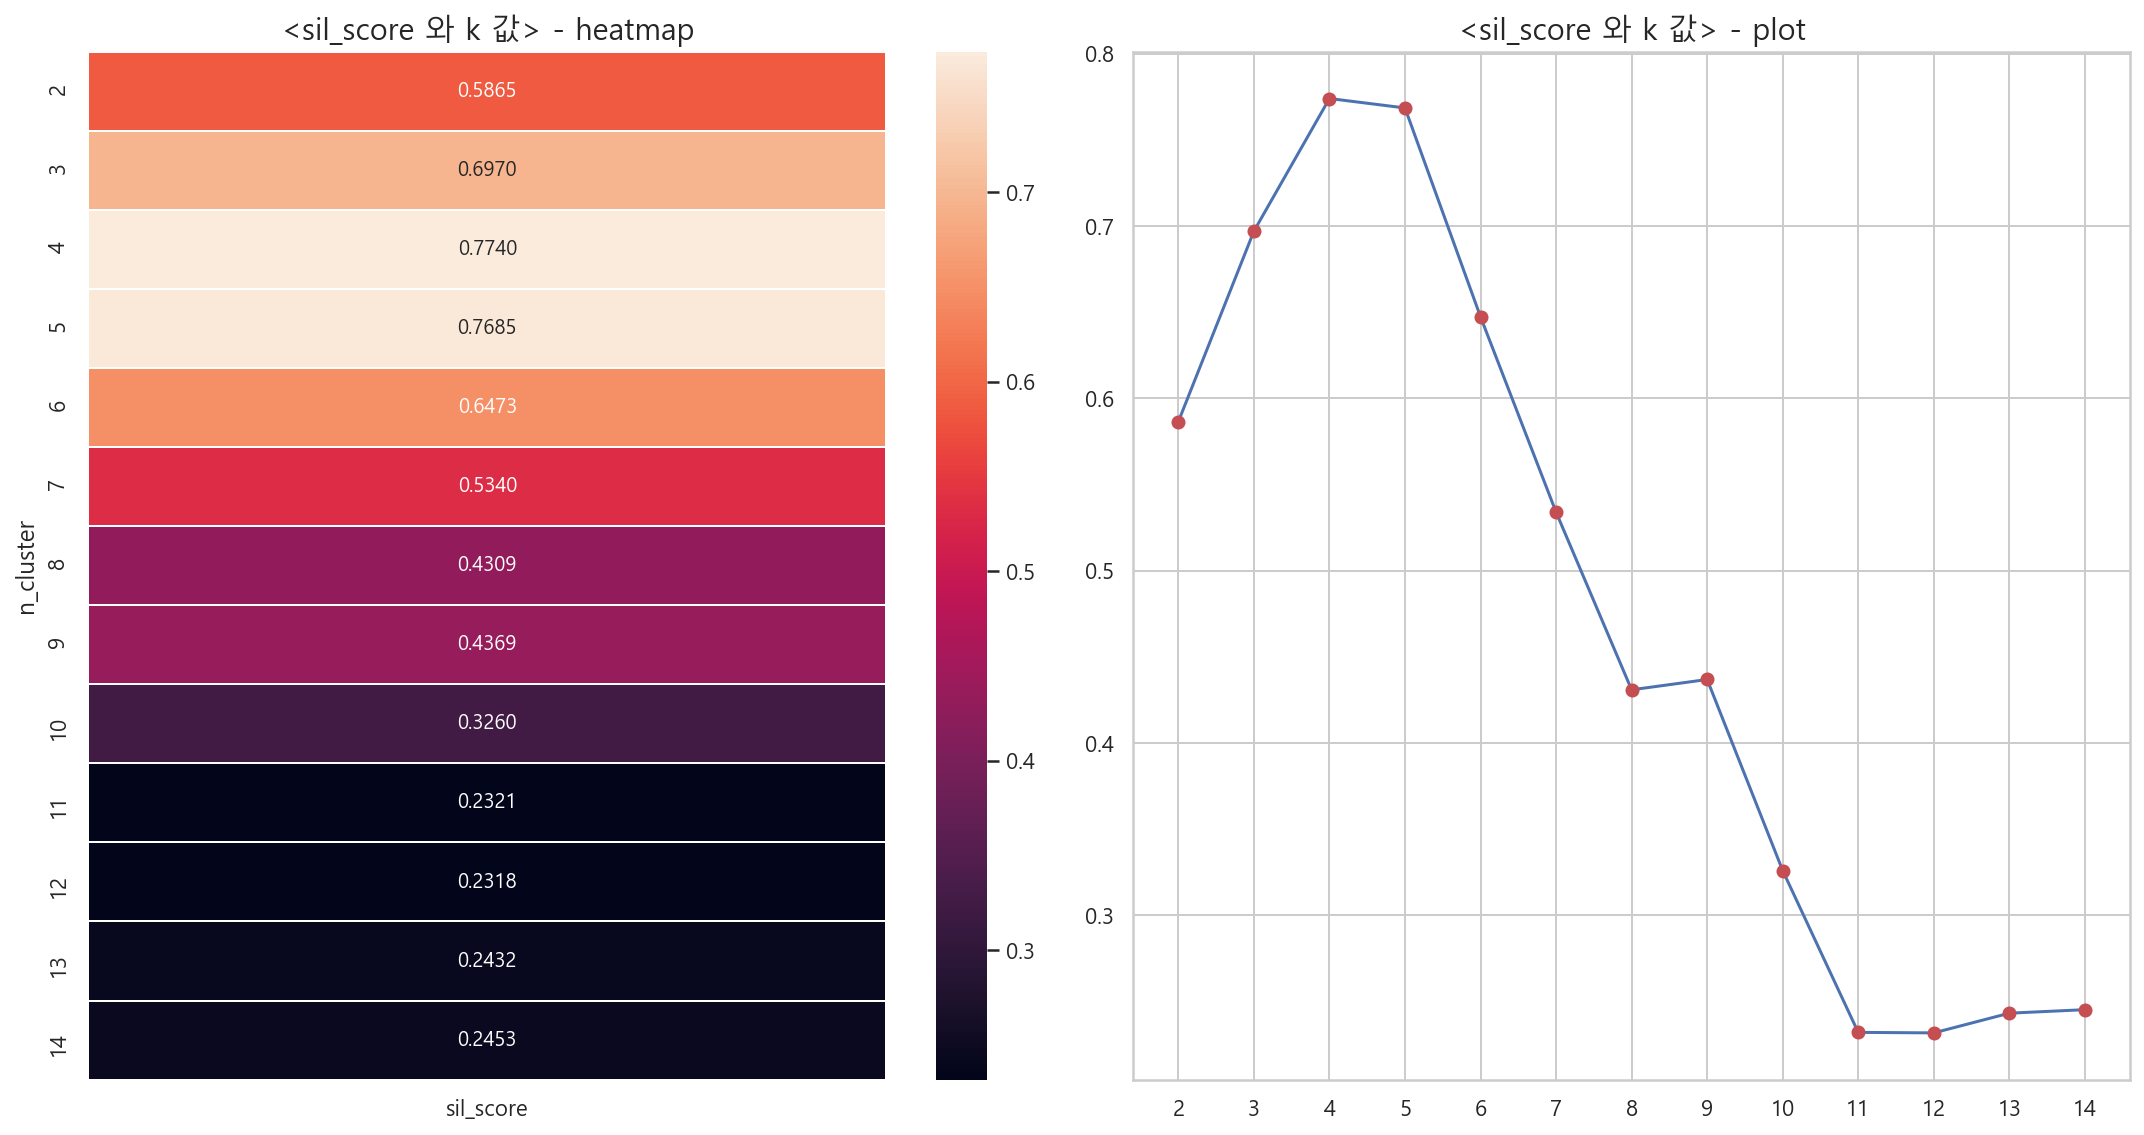

In [186]:
visualization_silhouette_layer(X)